# EXTERNAL DATASET

Este dataset contiene información complementaria obtenida de fuentes externas al CIBIl. Refleja indicadores financieros individuales capaces de optimizar el modelo. A continuación se deja una breve descripción de todas las variables:

**PROPECTID**: Un identificador único asignado a cada cliente.

**time_since_recent_payment**: Indica el tiempo transcurrido desde que el cliente realizó su último pago.

**time_since_first_deliquency**: Muestra el tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.

**time_since_recent_deliquency**: Indica el tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.

**num_times_delinquent**: Cuenta el número total de veces que el cliente ha incumplido con sus pagos.

**max_delinquency_level**: Muestra el nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).

**max_recent_level_of_deliq**: Indica el nivel máximo de morosidad en el período más reciente.

**num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Cuentan el número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.

**max_deliq_6mts, max_deliq_12mts**: Muestran el nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.

**num_times_30p_dpd, num_times_60p_dpd**: Cuentan el número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.

**num_std, num_std_6mts, num_std_12mts**: Cuentan el número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.

**num_sub, num_sub_6mts, num_sub_12mts**: Cuentan el número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.

**num_dbt, num_dbt_6mts, num_dbt_12mts**: Cuentan el número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.

**num_lss, num_lss_6mts, num_lss_12mts**: Cuentan el número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.

**recent_level_of_deliq**: Indica el nivel de morosidad más reciente del cliente.

**tot_enq**: Cuenta el número total de consultas realizadas por el cliente sobre su historial crediticio.

**CC_enq, PL_enq**: Cuentan el número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.

**CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Cuentan el número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.

**time_since_recent_enq**: Indica el tiempo transcurrido desde la última consulta realizada por el cliente.

**enq_L12m, enq_L6m, enq_L3m**: Cuentan el número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.

**MARITALSTATUS**: Indica el estado civil del cliente.

**EDUCATION**: Indica el nivel educativo del cliente.

**AGE**: Indica la edad del cliente.

**GENDER**: Indica el género del cliente.

**NETMONTHLYINCOME**: Indica el ingreso mensual neto del cliente.

**Time_With_Curr_Empr**: Indica el tiempo que el cliente lleva trabajando en su empleo actual.

**pct_of_active_TLs_ever**: Indica el porcentaje de cuentas activas en la historia del cliente.

**pct_opened_TLs_L6m_of_L12m**: Indica el porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.

**pct_currentBal_all_TL**: Indica el porcentaje de saldo pendiente sobre el total de préstamos.

**CC_utilization, PL_utilization**: Indican la utilización de tarjetas de crédito y préstamos personales, respectivamente.

**CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Son indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.

**last_prod_enq2, first_prod_enq2**: Indican el último y primer producto financiero consultado por el cliente.

**Credit_Score**: Indica la puntuación de crédito asignada al cliente.

**Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler, PowerTransformer
from scipy.stats import pearsonr, skew, boxcox
from IPython.display import Markdown, display
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'External_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
external.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print("="*100)

# Resumen estadístico de los datos numéricos
print(external.describe())
print("="*100)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))


   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [4]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

In [5]:
# Tipificamos valores que deben estar como booleanos
bool_features = []

for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

external[bool_features] = external[bool_features].astype('bool')

## 2. Calidad del Dato

### 2.1. Valores Nulos

In [6]:
# Mostrar cuántos valores nulos hay por columna y su porcentaje
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0]

p_nulos = (q_nulos/len(external) * 100).round(2)

df_nulos = pd.DataFrame({'Cantidad': q_nulos,
                      'Porcentaje': p_nulos}
                     ).sort_values(by='Cantidad', ascending=False)

print(df_nulos)


                              Cantidad  Porcentaje
CC_utilization                   47636       92.79
PL_utilization                   44435       86.56
time_since_recent_deliquency     35949       70.03
max_delinquency_level            35949       70.03
time_since_first_deliquency      35949       70.03
max_unsec_exposure_inPct         23178       45.15
max_deliq_6mts                   12890       25.11
max_deliq_12mts                  10832       21.10
PL_enq_L12m                       6321       12.31
CC_enq_L12m                       6321       12.31
tot_enq                           6321       12.31
CC_enq                            6321       12.31
CC_enq_L6m                        6321       12.31
enq_L3m                           6321       12.31
PL_enq_L6m                        6321       12.31
PL_enq                            6321       12.31
time_since_recent_enq             6321       12.31
enq_L12m                          6321       12.31
enq_L6m                        

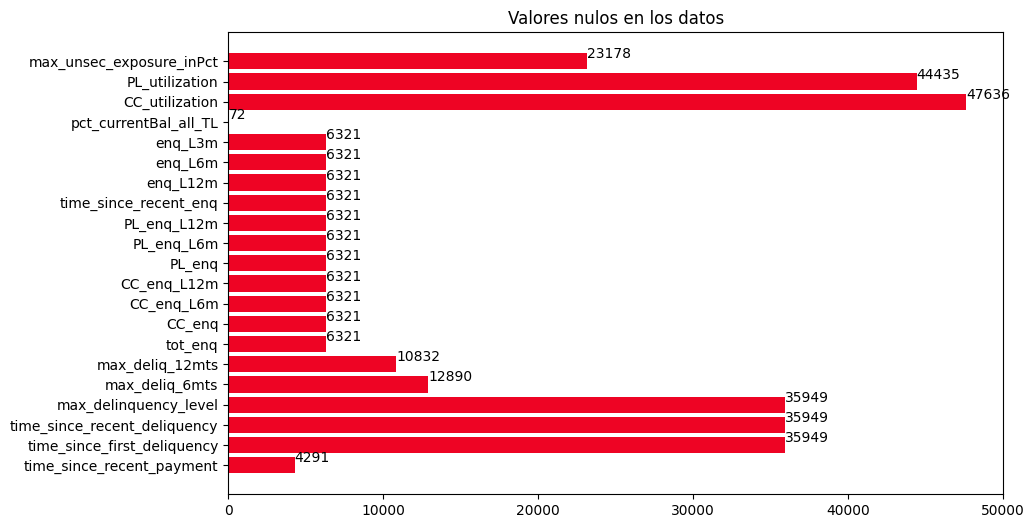

In [7]:
# Representamos mediante una gráfica de barras la cantidad de valores nulos por variable
plt.figure(figsize=(10, 6))
bars = plt.barh(y=q_nulos.index, width=q_nulos, color='#EE0424')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='bottom')
plt.title('Valores nulos en los datos')

plt.show()

**A. CC_utilization / PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores valtantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [8]:
# Se crea una función donde se realiza la comprobación en ambas variables
def print_flags(column_utilization, column_flag):
    filtered_data = external.dropna(subset=[column_utilization])
    print(filtered_data[column_flag].unique())

print_flags('CC_utilization', 'CC_Flag')
print("="*100)
print_flags('PL_utilization', 'PL_Flag')


[ True]
[ True]


In [9]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**B. max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

In [10]:
# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_delinquency_level', 'max_recent_level_of_deliq', external)

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [11]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**C. time_since_first_deliquency / time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [12]:
# Realizamos la comprobación en ambas variables
first_del = external[external['time_since_first_deliquency'].notna()]

print(first_del['num_times_delinquent'].max())

print("="*100)

recent_del = external[external['time_since_recent_deliquency'].notna()]

print(recent_del['num_times_delinquent'].max())

74
74


Comprobamos que hay ciertos clientes que si han incurrido en mora en reiteradas veces, por lo tanto no se dispone del dato pero este existe. Se procede a descartar las variables

In [13]:
# Se eliminan las variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**D. max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

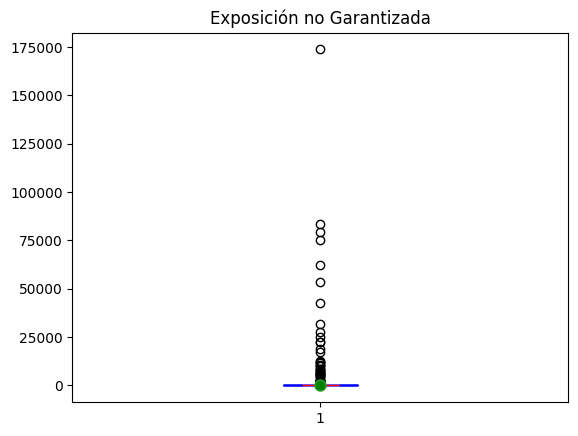

In [14]:
# Reprensentamos un boxplot para tener una visión de los valoes nulos
x = external['max_unsec_exposure_inPct'].dropna()

plt.boxplot(x, 
            notch=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title('Exposición no Garantizada')
plt.show()

In [15]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**E. max_deliq_6mts/max_deliq_12mts**: Representan dos variables con alrededor de un 20% de valores nulos. Las distribuciones entre sí, junto con la de *max_recent_level_of_deliq* son bastante similares. Por úlitmo, se comprueba la correlación entre ambas y debido a los resultados se decide eliminarlas

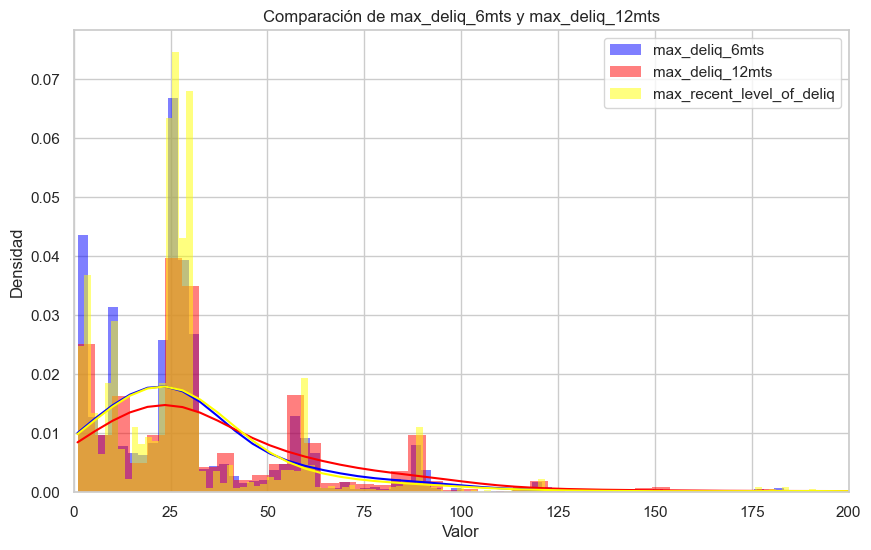

In [16]:
# Representamos un histograma para conocer las distribuciones
x = external[(external['max_deliq_6mts'] > 0)].dropna(subset=['max_deliq_6mts', 'max_deliq_12mts'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlim(right=200)

sns.histplot(x['max_deliq_6mts'], kde=True, color='blue', label='max_deliq_6mts', stat='density', linewidth=0)
sns.histplot(x['max_deliq_12mts'], kde=True, color='red', label='max_deliq_12mts', stat='density', linewidth=0)
sns.histplot(x['max_recent_level_of_deliq'], kde=True, color='yellow', label='max_recent_level_of_deliq', stat='density', linewidth=0)

plt.legend()
plt.title('Comparación de max_deliq_6mts y max_deliq_12mts')
plt.xlabel('Valor')
plt.ylabel('Densidad')

plt.show()

In [17]:
# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_deliq_6mts', 'max_deliq_12mts', external)

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [18]:
# Se eliminan las variables
external = external.drop(['max_deliq_6mts', 'max_deliq_12mts'], axis=1)

**F. tot_enq, CC_enq_L6m, CC_enq, CC_enq_L12m, PL_enq, enq_L12m, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L3m, enq_L6m, time_since_recent_payment, pct_currentBal_all_TL**: Todas estas vaiables representan características de cada cliente en referencia a las consultas sobre productos financieros. Sus valores están relacionados. Sustituimos todos los valores relacionados con los productos CC y PL por el valor 0 debido a que se llega a la conclusión de que son clientes que no han realizado ninguna consulta. Se sustituye por 1 la variable **tot_enq** debido a que mínimo han realizado una consulta a los productos *others*

In [19]:
# Observamos de nuevo la cantidad de valores nulos que tenemos por variable
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0].sort_values(ascending=False)

print(q_nulos)

tot_enq                      6321
CC_enq_L6m                   6321
CC_enq                       6321
CC_enq_L12m                  6321
PL_enq                       6321
enq_L12m                     6321
PL_enq_L6m                   6321
PL_enq_L12m                  6321
time_since_recent_enq        6321
enq_L3m                      6321
enq_L6m                      6321
time_since_recent_payment    4291
pct_currentBal_all_TL          72
dtype: int64


Confirmamos que todas las variables que representan algún aspecto relacionado con las **consultas(enq)** tienen la misma cantidad de valores nulos

In [20]:
# Creo un bucle para verificar que los valores no nulos de las variables enq tienen los mismos índices
contador = 0
while contador < 12:
    col1 = q_nulos.index[0]
    col2 = q_nulos.index[contador]
    col1_limpia = external.dropna(subset=[col1])
    col2_limpia = external.dropna(subset=[col2])
    
    ids_col1 = set(col1_limpia['PROSPECTID'])
    ids_col2 = set(col2_limpia['PROSPECTID'])
    
    if ids_col1 == ids_col2:
        print(f"Las columnas {col1} y {col2} tienen los mismos IDs después de eliminar los valores nulos.")
    else:
        print(f"Las columnas {col1} y {col2} tienen diferentes IDs después de eliminar los valores nulos.")
    print("="*100)
    contador += 1

Las columnas tot_enq y tot_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y time_since_recent_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L3m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L6m tienen los mismos IDs 

Confirmamos que todos los valores nulos de las variables **enq** pertenecen a las mismas observaciones

In [21]:
# Describimos las variables numéricas
external[external['tot_enq'].isnull()].describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count   6321.000000                4944.000000           6321.000000   
mean   25696.895744                 510.129450              0.876285   
std    14662.276736                 696.802393              2.922827   
min        4.000000                  10.000000              0.000000   
25%    13233.000000                  77.000000              0.000000   
50%    25369.000000                 221.000000              0.000000   
75%    38309.000000                 655.000000              0.000000   
max    51329.000000                5690.000000             39.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count                6321.000000     6321.000000      6321.000000   
mean                   11.093972        0.065338         0.164373   
std                    53.197138        0.426573         0.842710   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                     0.000000        0.000000         0.000000   
max                   900.000000        6.000000        11.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd      num_std  \
count        6321.000000        6321.000000        6321.000000  6321.000000   
mean            0.099035           0.575542           0.411644    12.086537   
std             0.555753           2.342243           1.965723    22.997495   
min             0.000000           0.000000           0.000000     0.000000   
25%             0.000000           0.000000           0.000000     0.000000   
50%             0.000000           0.000000           0.000000     1.000000   
75%             0.000000           0.000000           0.000000    16.000000   
max            11.000000          34.000000          32.000000   303.000000   

       num_std_6mts  num_std_12mts      num_sub  num_sub_6mts  num_sub_12mts  \
count   6321.000000    6321.000000  6321.000000   6321.000000    6321.000000   
mean       1.880873       4.251859     0.072457      0.005062       0.013764   
std        3.686902       8.126716     0.925621      0.152945       0.343060   
min        0.000000       0.000000     0.000000      0.000000       0.000000   
25%        0.000000       0.000000     0.000000      0.000000       0.000000   
50%        0.000000       0.000000     0.000000      0.000000       0.000000   
75%        3.000000       7.000000     0.000000      0.000000       0.000000   
max       60.000000     107.000000    42.000000      8.000000      20.000000   

           num_dbt  num_dbt_6mts  num_dbt_12mts      num_lss  num_lss_6mts  \
count  6321.000000   6321.000000    6321.000000  6321.000000        6321.0   
mean      0.042715      0.001266       0.005062     0.011232           0.0   
std       0.797788      0.071146       0.190701     0.296659           0.0   
min       0.000000      0.000000       0.000000     0.000000           0.0   
25%       0.000000      0.000000       0.000000     0.000000           0.0   
50%       0.000000      0.000000       0.000000     0.000000           0.0   
75%       0.000000      0.000000       0.000000     0.000000           0.0   
max      32.000000      4.000000      10.000000    15.000000           0.0   

       num_lss_12mts  recent_level_of_deliq  tot_enq  CC_enq  CC_enq_L6m  \
count    6321.000000            6321.000000      0.0     0.0         0.0   
mean        0.000633               9.728524      NaN     NaN         NaN   
std         0.035573              46.954189      NaN     NaN         NaN   
min         0.000000               0.000000      NaN     NaN         NaN   
25%         0.000000               0.000000      NaN     NaN         NaN   
50%         0.000000               0.000000      NaN     NaN         NaN   
75%         0.000000               0.000000      NaN     NaN         N

In [22]:
# Describimos las variables objeto
external[external['tot_enq'].isnull()].describe(include='object')

MARITALSTATUS EDUCATION GENDER last_prod_enq2 first_prod_enq2  \
count           6321      6321   6321           6321            6321   
unique             2         7      2              1               1   
top          Married      12TH      M         others          others   
freq            4857      1897   5319           6321            6321   

       Approved_Flag  
count           6321  
unique             4  
top               P2  
freq            4967

Observamos que las variables que representan el porcentaje de consultas tienen un **valor de 0**. Y que los últimas consultas que realizó fueron a los productos **others**.

In [23]:
# Bucle para sustituir los valores nulos de las variables enq por 0
for col in [
    "CC_enq_L6m", "CC_enq", "CC_enq_L12m", "PL_enq", 
    "enq_L12m", "PL_enq_L6m", "PL_enq_L12m", "time_since_recent_enq", 
    "enq_L3m", "enq_L6m"
]:
    external[col] = external[col].fillna(0)

# Bucle para sustituir los valores de 'tot_enq' por 1
external["tot_enq"] = external["tot_enq"].fillna(1)

**G. time_since_recent_payment:** Se revisa que algunos tienen pagos registrados en los últimos 6 o, 12 o más meses. Se decide hacer una sustitución por los valores nulos en función de la franja de pago que tengan registrados.

In [24]:
# Revisamos las características estadísticasd de las variables
external[external['time_since_recent_payment'].isnull()].describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count   4291.000000                        0.0           4291.000000   
mean   25837.757166                        NaN              0.602890   
std    14828.647401                        NaN              2.456774   
min        4.000000                        NaN              0.000000   
25%    13010.000000                        NaN              0.000000   
50%    25562.000000                        NaN              0.000000   
75%    38796.500000                        NaN              0.000000   
max    51329.000000                        NaN             32.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count                4291.000000     4291.000000      4291.000000   
mean                    7.144955        0.051503         0.147751   
std                    42.907087        0.355974         0.787775   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                     0.000000        0.000000         0.000000   
max                   900.000000        5.000000        11.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd      num_std  \
count        4291.000000        4291.000000        4291.000000  4291.000000   
mean            0.096248           0.389420           0.271498     4.798648   
std             0.559147           1.966045           1.611490    12.327864   
min             0.000000           0.000000           0.000000     0.000000   
25%             0.000000           0.000000           0.000000     0.000000   
50%             0.000000           0.000000           0.000000     0.000000   
75%             0.000000           0.000000           0.000000     3.000000   
max             6.000000          31.000000          31.000000   188.000000   

       num_std_6mts  num_std_12mts      num_sub  num_sub_6mts  num_sub_12mts  \
count   4291.000000    4291.000000  4291.000000        4291.0    4291.000000   
mean       0.980890       2.069914     0.019110           0.0       0.000699   
std        2.280577       5.015478     0.390575           0.0       0.026435   
min        0.000000       0.000000     0.000000           0.0       0.000000   
25%        0.000000       0.000000     0.000000           0.0       0.000000   
50%        0.000000       0.000000     0.000000           0.0       0.000000   
75%        0.000000       1.000000     0.000000           0.0       0.000000   
max       28.000000      75.000000    14.000000           0.0       1.000000   

           num_dbt  num_dbt_6mts  num_dbt_12mts      num_lss  num_lss_6mts  \
count  4291.000000   4291.000000    4291.000000  4291.000000        4291.0   
mean      0.022838      0.000932       0.002330     0.001864           0.0   
std       0.612945      0.061063       0.152658     0.077828           0.0   
min       0.000000      0.000000       0.000000     0.000000           0.0   
25%       0.000000      0.000000       0.000000     0.000000           0.0   
50%       0.000000      0.000000       0.000000     0.000000           0.0   
75%       0.000000      0.000000       0.000000     0.000000           0.0   
max      25.000000      4.000000      10.000000     4.000000           0.0   

       num_lss_12mts  recent_level_of_deliq      tot_enq       CC_enq  \
count         4291.0            4291.000000  4291.000000  4291.000000   
mean             0.0               6.379632     2.304824     0.137730   
std              0.0              38.157301     2.621913     0.651268   
min              0.0               0.000000     1.000000     0.000000   
25%              0.0               0.000000     1.000000     0.000000   
50%              0.0               0.000000     1.000000     0.000000   
75%              0.0               0.000000     3.000000     0.000000   
max              0

In [25]:
# Creamos un script para sustituir los valores nulos
_ = external[external['time_since_recent_payment'].isnull()]

media_pago6 = external[external['time_since_recent_payment'] <= 180]['time_since_recent_payment'].mean()
mediana_pago12 = external[external['time_since_recent_payment'] > 180]['time_since_recent_payment'].median()

q6 = _['num_std_6mts'] + _['num_sub_6mts']
q12 = _['num_std_12mts'] + _['num_sub_12mts']

# En el caso de que haya realizado un pago en los últimos 6 meses le asignamos la media
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q6 > 0), 
    'time_since_recent_payment'
] = round(media_pago6, 0)

# En el caso de que haya realizado un pago en los últimos 12 meses o más le asignamos la (mediana debido a los outliers)
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q12 > 0), 
    'time_since_recent_payment'
] = round(mediana_pago12, 0)

# Para el resto si no se han registrado pagos se le asigna 0
external.loc[
    external['time_since_recent_payment'].isnull(), 
    'time_since_recent_payment'
] = 0

**H. pct_currentBal_all_TL:** a esta variable le asignaremos la media de de sus valores evitando los valores atípicos que los manejaremos más adelante

In [26]:
# Creamos la constante  y la asignamos a los valores nulos
media_ins = external.loc[external['pct_currentBal_all_TL'] <= 1, 'pct_currentBal_all_TL'].mean()
external['pct_currentBal_all_TL'] = external['pct_currentBal_all_TL'].fillna(round(media_ins, 2))


In [27]:
external.isnull().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [28]:
# Cambiamos todos aquellos valores float sin decimales a tipo int
float_columns = external.select_dtypes(include=['float']).columns
columns_to_convert = [col for col in float_columns if (external[col] % 1 == 0).all()]
external[columns_to_convert] = external[columns_to_convert].astype(int)
print(f"Columnas convertidas a int: {columns_to_convert}")

Columnas convertidas a int: ['time_since_recent_payment', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m']


In [29]:
# Creamos una variable con las variables numéricas
numeric_features = []

for col in external.columns:
    if external[col].dtype != 'object' and external[col].dtype != 'bool' and col not in ['PROSPECTID']:
        numeric_features.append(col)

len(numeric_features)

45

In [30]:
# Creamos un diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers
for column in numeric_features:
    Q1 = external[column].quantile(0.25)
    Q3 = external[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = external[(external[column] < lower_bound) | (external[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostramos el recuento
print("Recuento de outliers por feature:")
for column, count in outlier_count.items():
    if count != 0:
        print(f"{column}: {count}")
    else:
        pass

Recuento de outliers por feature:
time_since_recent_payment: 8788
num_times_delinquent: 8457
max_recent_level_of_deliq: 8495
num_deliq_6mts: 4782
num_deliq_12mts: 8428
num_deliq_6_12mts: 6149
num_times_30p_dpd: 7991
num_times_60p_dpd: 4889
num_std: 7381
num_std_6mts: 11316
num_std_12mts: 9443
num_sub: 654
num_sub_6mts: 51
num_sub_12mts: 158
num_dbt: 170
num_dbt_6mts: 16
num_dbt_12mts: 40
num_lss: 102
num_lss_6mts: 12
num_lss_12mts: 25
recent_level_of_deliq: 10321
tot_enq: 3358
CC_enq: 7835
CC_enq_L6m: 3935
CC_enq_L12m: 5452
PL_enq: 6242
PL_enq_L6m: 11100
PL_enq_L12m: 3830
time_since_recent_enq: 5600
enq_L12m: 4097
enq_L6m: 3809
enq_L3m: 6858
AGE: 582
NETMONTHLYINCOME: 3106
Time_With_Curr_Empr: 4154
pct_currentBal_all_TL: 49
CC_utilization: 3128
PL_utilization: 6723
pct_PL_enq_L6m_of_L12m: 11100
pct_CC_enq_L6m_of_L12m: 3935
pct_PL_enq_L6m_of_ever: 11100
pct_CC_enq_L6m_of_ever: 3935
Credit_Score: 2106


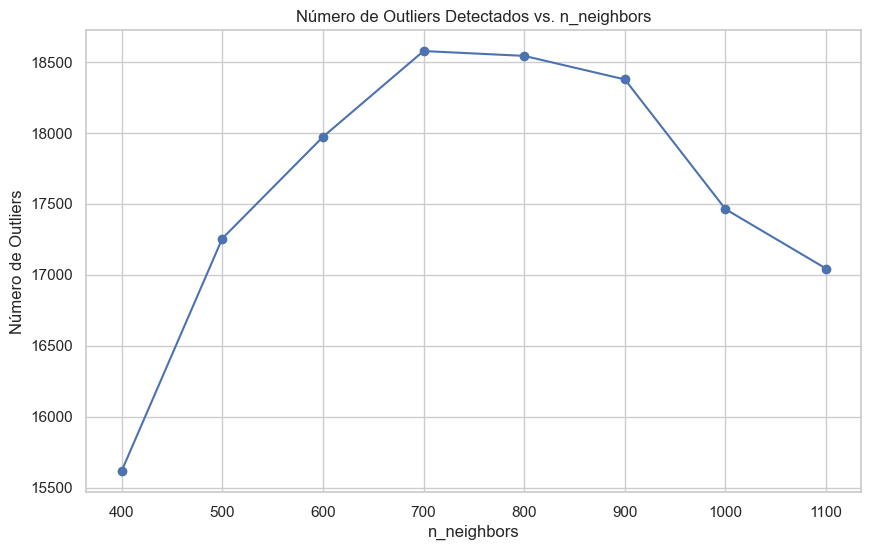

n_neighbors=400 -> Número de outliers: 15616
n_neighbors=500 -> Número de outliers: 17254
n_neighbors=600 -> Número de outliers: 17970
n_neighbors=700 -> Número de outliers: 18575
n_neighbors=800 -> Número de outliers: 18541
n_neighbors=900 -> Número de outliers: 18375
n_neighbors=1000 -> Número de outliers: 17461
n_neighbors=1100 -> Número de outliers: 17042
El valor de n_neighbors con el máximo número de outliers (18575) es: 700


PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  18575.000000               18575.000000          18575.000000   
mean   25571.043930                 475.163715              1.894966   
std    14876.133948                 661.835614              4.768599   
min        1.000000                   0.000000              0.000000   
25%    12592.000000                  62.000000              0.000000   
50%    25447.000000                 196.000000              0.000000   
75%    38464.500000                 633.000000              1.000000   
max    51332.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count               18575.000000    18575.000000     18575.000000   
mean                   21.637362        0.167268         0.433378   
std                    80.950354        0.712126         1.511795   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                    18.000000        0.000000         0.000000   
max                   900.000000       12.000000        25.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd       num_std  \
count       18575.000000       18575.000000       18575.000000  18575.000000   
mean            0.266110           1.043553           0.688183     10.921561   
std             0.996592           3.456928           2.779464     25.027908   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           0.000000      0.000000   
75%             0.000000           0.000000           0.000000     12.000000   
max            20.000000          60.000000          52.000000    422.000000   

       num_std_6mts  num_std_12mts       num_sub  num_sub_6mts  num_sub_12mts  \
count  18575.000000   18575.000000  18575.000000  18575.000000    18575.00000   
mean       1.532705       3.591386      0.084738      0.003176        0.01179   
std        3.741498       8.519553      0.980004      0.114806        0.28270   
min        0.000000       0.000000      0.000000      0.000000        0.00000   
25%        0.000000       0.000000      0.000000      0.000000        0.00000   
50%        0.000000       0.000000      0.000000      0.000000        0.00000   
75%        1.000000       3.000000      0.000000      0.000000        0.00000   
max       60.000000     122.000000     42.000000      8.000000       20.00000   

            num_dbt  num_dbt_6mts  num_dbt_12mts       num_lss  num_lss_6mts  \
count  18575.000000  18575.000000   18575.000000  18575.000000  18575.000000   
mean       0.041615      0.002207       0.007537      0.022988      0.001723   
std        0.831141      0.093076       0.241017      0.731072      0.108323   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        0.000000      0.000000       0.000000      0.000000      0.000000   
max       35.000000      5.000000      11.000000     72.000000     12.000000   

       num_lss_12mts  recent_level_of_deliq       tot_enq        CC_enq  \
count   18575.000000           18575.000000  18575.000000  18575.000000   
mean        0.005061              17.799408      3.854590      0.316393   
std         0.272529              69.864927      5.579425      1.421231   
min         0.000000               0.000000      1.000000      0.000000   
25%         0.000000               0.000000      1.000000      0.000000   
50%         0.000000               0.000000      2.000000      0.000000   
75%         0.000000              14.0000

In [84]:
# Rango de valores para n_neighbors
neighbors_range = range(400,1101, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(external[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f"n_neighbors={n} -> Número de outliers: {count}")
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(external[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = external.iloc[outliers]

outlier_values.describe()


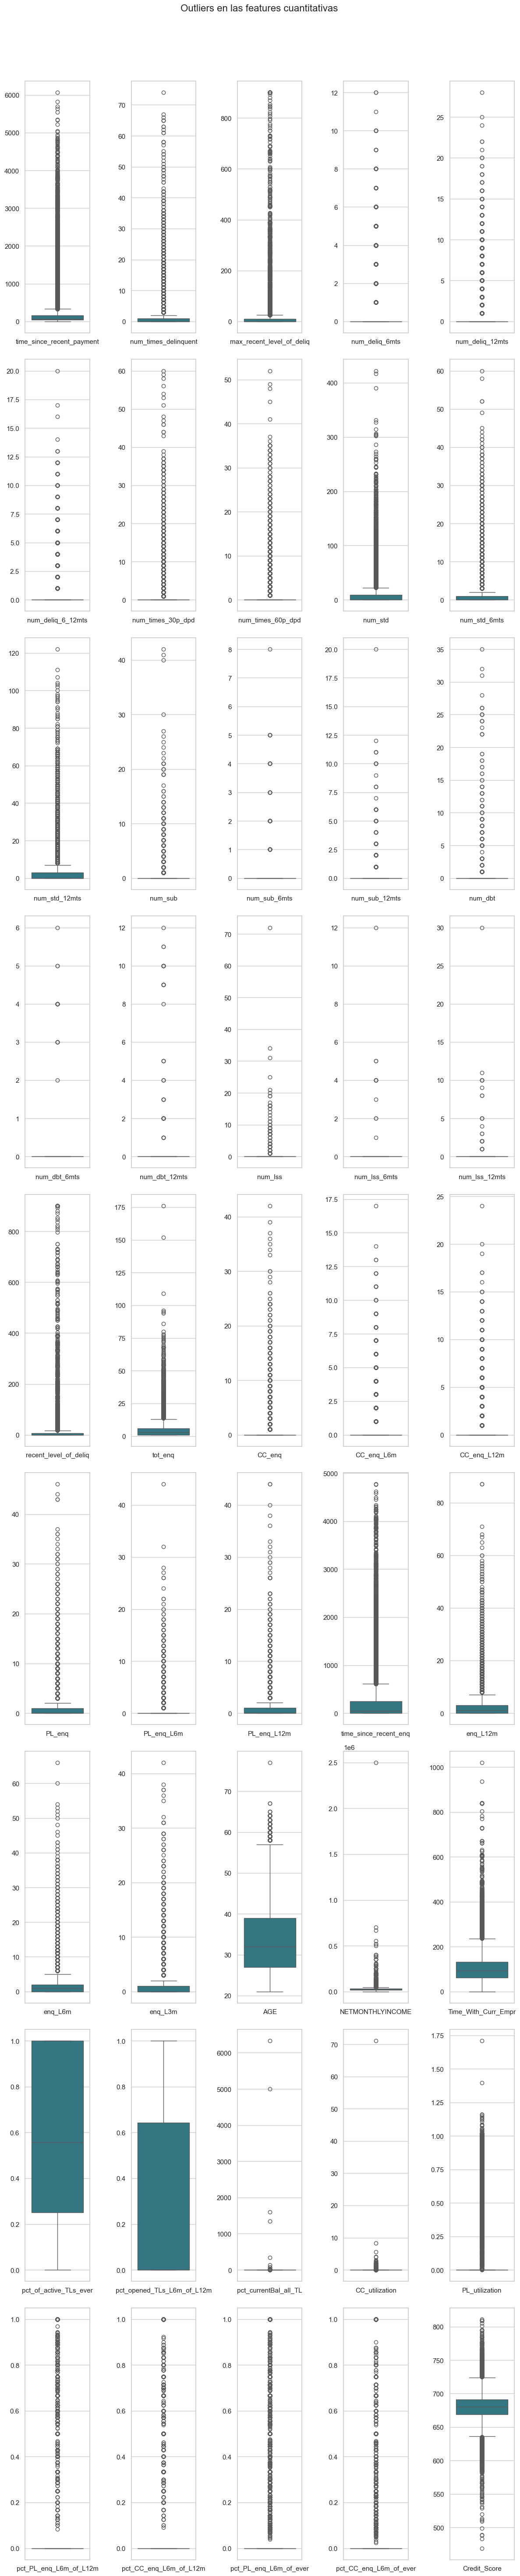

In [34]:
# Estilo
sns.set_palette("Set2")

color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(numeric_features):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=external[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Vemos que hay una alta proporción de outliers por lo que procedemos con su tratamiento

#### 2.3.2. Imputación de Outliers

Las variables **pct_currentBal_all_TL, CC_utilization y PL_utilization** deberían estar en un rango de 0 a 1 debido a que son porcentajes. Dicho esto, se procede a asignar el valor a la alta para tales valores atípicos.

In [35]:
# Crear una máscara para las filas donde la condición se cumple y asignarle el valor superior
pct_cols = ['pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization']
for i in pct_cols:
    mask = external[i] > 1
    external.loc[mask, i] = 1

La variable **Time_With_Curr_Empr** está representada en meses. Por lo que es imposible que haya valores tan altos para edades tan bajas, lo que me hace llegar a la conclusión que esos valores están en días en vez de en meses. Realizaremos una operación con vectores y su correspondiente mascara para realizar un proceso de filtrado y reasignación de valores. Todos aquellos que tengan una cantidad de tiempo en su actual empleo superior a su tiempo activo se le imputará el valor que tienen formateado en meses.

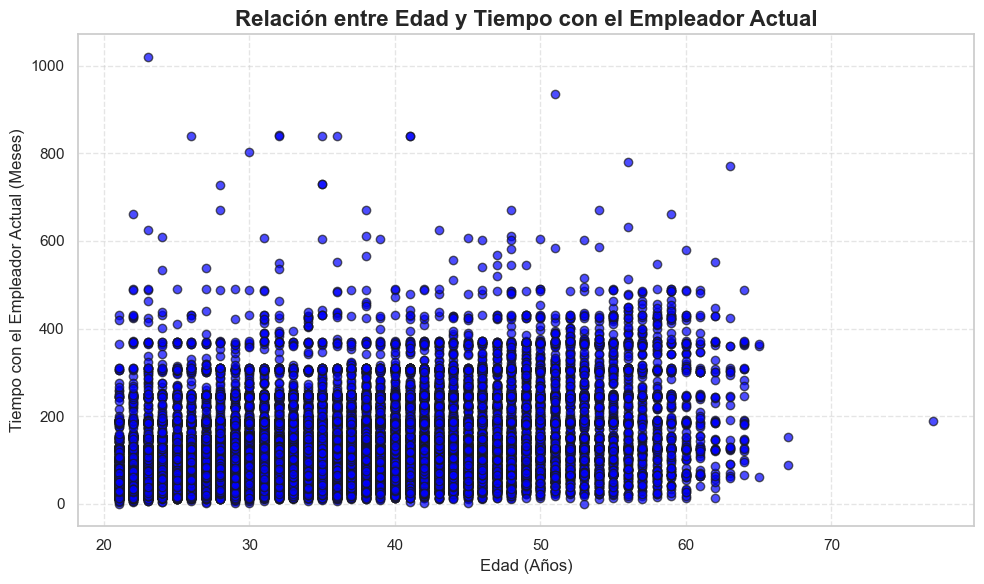

In [36]:
# Representamos la relación entre la edad y el tiempo que llevan en el actual empleo
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
# Para calcular el tiempo activo se le resta 10 a la edad (En la India es típico la explotación infantil)
TIME_ACTIVE = external['AGE'] - 10
CURR_EMPL_YEAR = external['Time_With_Curr_Empr'] / 12

# Crear una máscara para las filas donde la condición se cumple
mask = CURR_EMPL_YEAR > TIME_ACTIVE

# Actualizar las filas específicas de forma vectorizada
external.loc[mask, 'Time_With_Curr_Empr'] = external.loc[mask, 'Time_With_Curr_Empr'] / 12

C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\3142089663.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[22.91666667 25.5        12.5        ... 15.91666667 30.83333333
 15.58333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  external.loc[mask, 'Time_With_Curr_Empr'] = external.loc[mask, 'Time_With_Curr_Empr'] / 12


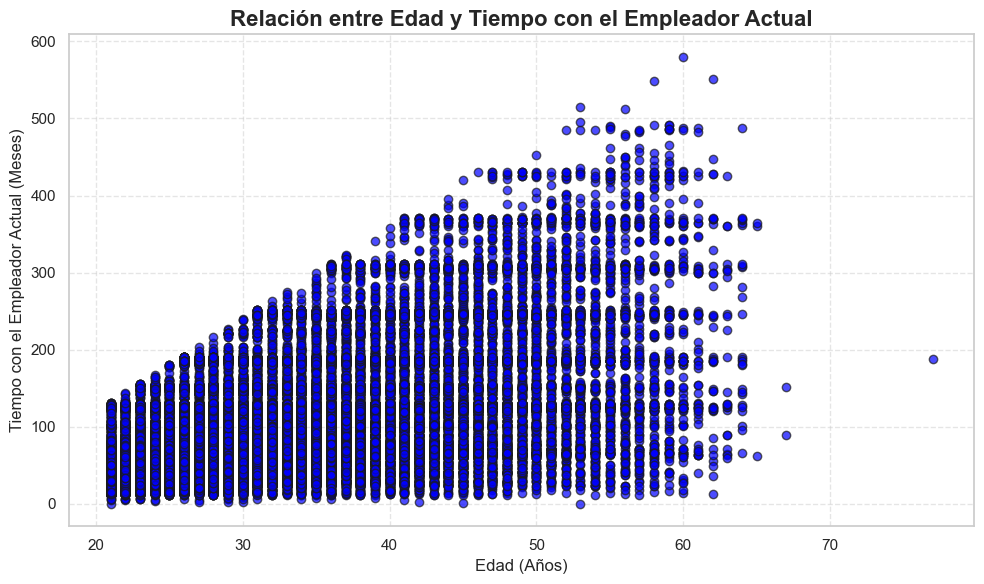

In [38]:
# Volvemos a representar para ver el cambio lógico de la representación
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2.3.3. Transformación de las distribuciones

Para transformar las distribuciones de las variables, tomaremos la siguiente estrategia. Primero, identificamos las variables con una asimetría positiva significativa, definida por un umbral de asimetría mayor a 1. Para estas variables, aplicamos una transformación logarítmica, que comprime la escala de los valores grandes, reduce la cola derecha de la distribución y suaviza las variaciones extremas, mejorando la normalidad de las variables y su adecuación para modelos predictivos que asumen distribuciones simétricas. A continuación, las variables que tienen una distribución discreta serán escaladas utilizando un escalado robusto mediante RobustScaler, lo que permite minimizar el impacto de los valores atípicos manteniendo las relaciones entre los datos. Finalmente, las variables continuas serán transformadas mediante el método Box-Cox, el cual ajusta la forma de la distribución a una más normal, optimizando la precisión de los modelos estadísticos y la eficacia del análisis predictivo. Estas transformaciones combinadas preparan el conjunto de datos para análisis avanzados con mejores resultados.

In [91]:
# Inicializar listas para variables transformadas
log_transformed = []
robust_scaled = []
boxcox_transformed = []

# Crear una copia del DataFrame original
prueba = external.copy()

# Iterar sobre las características numéricas
for col in numeric_features:
    series = prueba[col]

    # Si la asimetría es mayor que 1, aplicar transformación logarítmica
    if skew(series) > 1.5:
        prueba[col] = np.log(series + 1)  # Asegúrate de que no hay valores negativos
        log_transformed.append(col)
    
    # Si es un entero, aplicar escalado robusto
    elif np.issubdtype(series.dtype, np.integer):
        r_scaler = RobustScaler()
        prueba[col] = r_scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        robust_scaled.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:  # Aquí asumimos que si no es entero, es flotante
        prueba[col], _ = boxcox(series + 1)  # Aseguramos valores positivos sumando 1
        boxcox_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con RobustScaler: {robust_scaled}')
print(f'Variables transformadas con Box-Cox: {boxcox_transformed}')


Variables transformadas con logaritmo: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'NETMONTHLYINCOME', 'CC_utilization', 'PL_utilization', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever']
Variables transformadas con RobustScaler: ['AGE', 'Credit_Score']
Variables transformadas con Box-Cox: ['Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL']


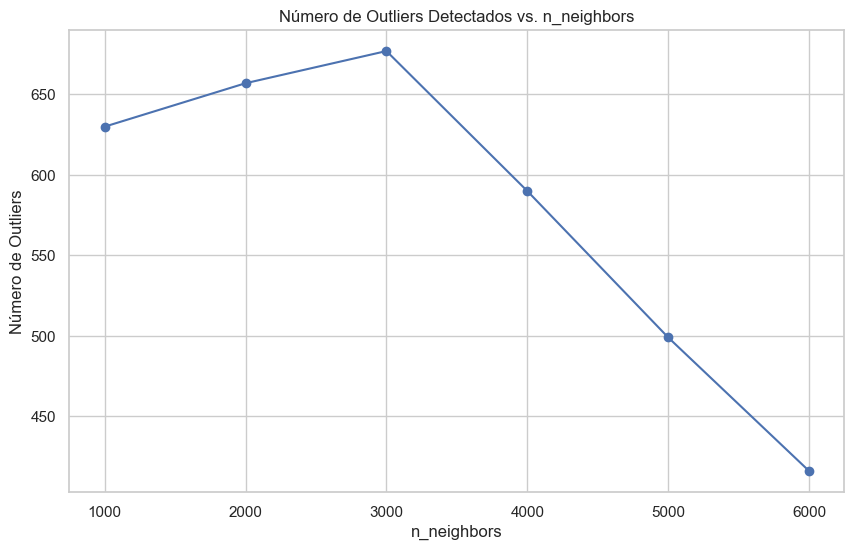

n_neighbors=1000 -> Número de outliers: 630
n_neighbors=2000 -> Número de outliers: 657
n_neighbors=3000 -> Número de outliers: 677
n_neighbors=4000 -> Número de outliers: 590
n_neighbors=5000 -> Número de outliers: 499
n_neighbors=6000 -> Número de outliers: 416
El valor de n_neighbors con el máximo número de outliers (677) es: 3000


PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count    677.000000                 677.000000            677.000000   
mean   26313.228951                   2.867188              0.590532   
std    15088.686317                   2.446491              1.073791   
min        3.000000                   0.000000              0.000000   
25%    12765.000000                   0.000000              0.000000   
50%    27585.000000                   3.663562              0.000000   
75%    39340.000000                   4.430817              0.693147   
max    51319.000000                   8.281724              4.077537   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count                 677.000000      677.000000       677.000000   
mean                    1.034827        0.171315         0.296198   
std                     1.978471        0.466552         0.679688   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                     0.693147        0.000000         0.000000   
max                     6.803505        2.397895         3.044522   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd     num_std  \
count         677.000000         677.000000         677.000000  677.000000   
mean            0.203602           0.399199           0.334730    0.753280   
std             0.539486           0.934783           0.873156    1.401235   
min             0.000000           0.000000           0.000000    0.000000   
25%             0.000000           0.000000           0.000000    0.000000   
50%             0.000000           0.000000           0.000000    0.000000   
75%             0.000000           0.000000           0.000000    1.098612   
max             2.564949           4.007333           3.828641    6.035481   

       num_std_6mts  num_std_12mts     num_sub  num_sub_6mts  num_sub_12mts  \
count    677.000000     677.000000  677.000000    677.000000     677.000000   
mean       0.299286       0.401285    0.098886      0.015940       0.033338   
std        0.789859       1.022528    0.485431      0.169700       0.258090   
min        0.000000       0.000000    0.000000      0.000000       0.000000   
25%        0.000000       0.000000    0.000000      0.000000       0.000000   
50%        0.000000       0.000000    0.000000      0.000000       0.000000   
75%        0.000000       0.000000    0.000000      0.000000       0.000000   
max        4.110874       4.682131    3.761200      2.197225       3.044522   

          num_dbt  num_dbt_6mts  num_dbt_12mts     num_lss  num_lss_6mts  \
count  677.000000    677.000000     677.000000  677.000000    677.000000   
mean     0.109629      0.029700       0.052218    0.045511      0.013567   
std      0.537183      0.213896       0.334029    0.366530      0.160600   
min      0.000000      0.000000       0.000000    0.000000      0.000000   
25%      0.000000      0.000000       0.000000    0.000000      0.000000   
50%      0.000000      0.000000       0.000000    0.000000      0.000000   
75%      0.000000      0.000000       0.000000    0.000000      0.000000   
max      3.583519      1.791759       2.484907    4.290459      2.564949   

       num_lss_12mts  recent_level_of_deliq     tot_enq      CC_enq  \
count     677.000000             677.000000  677.000000  677.000000   
mean        0.025545               0.990983    1.736749    0.511971   
std         0.245269               1.926074    1.170633    0.905964   
min         0.000000               0.000000    0.693147    0.000000   
25%         0.000000               0.000000    0.693147    0.000000   
50%         0.000000               0.000000    1.386294    0.000000   
75%         0.000000               0.693147    2.484907    0.693147   
max         3.433987               6.803505    5.176150    3.761200   

In [92]:
# Rango de valores para n_neighbors
neighbors_range = range(1000,4001, 1000)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(prueba[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f"n_neighbors={n} -> Número de outliers: {count}")
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(prueba[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = prueba.iloc[outliers]

outlier_values.describe()


Estas técnicas han mejorado la simetría de las distribuciones, reducido la influencia de outliers y unificado las escalas, lo que debería contribuir a un mejor rendimiento de los modelos predictivos.


Este enfoque se aplicará después del análisis descriptivo para evaluar el impacto de las transformaciones sobre la calidad del modelo, comparando su desempeño con y sin la presencia de outliers. Esto permitirá determinar la efectividad de las transformaciones y seleccionar la mejor estrategia de preprocesamiento para el conjunto de datos.

## 3. Análisis Univariante (Test estadísticos)

### 3.1. Variables categóricas

In [52]:
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list()
cat_features

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [158]:
def Count_Cat(df, cat_feat):
    # Verificación inicial
    if cat_feat not in df.columns:
        raise ValueError(f"La columna '{cat_feat}' no existe en el DataFrame.")

    # Valores únicos
    unique_values = df[cat_feat].nunique()
    
    # Encabezado
    print()
    print()
    formatted_text = f"**{cat_feat.upper()}**"
    try:
        display(Markdown(formatted_text)) 
    except:
        print(formatted_text)
    print(f"El número de categorías distintas en la variable '{cat_feat}' es {unique_values}.")

    # Datos
    feat_count = df[cat_feat].value_counts()
    feat_perc = (feat_count / len(df)) * 100
    feat_res = pd.DataFrame({'Recuento': feat_count, '%': round(feat_perc, 2)}).sort_values(by='Recuento', ascending=False).head(30)

    # Configuración de estilo
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18, 10))
    spec = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

    # Gráfico de barras
    ax0 = plt.subplot(spec[0])
    sns.barplot(y='%', x=feat_res.index, data=feat_res, palette="viridis", ax=ax0, hue=feat_res.index)
    ax0.set_title(f'Porcentaje de instancias por {cat_feat}', fontsize=14)
    ax0.set_ylabel('% de instancias', fontsize=14)
    ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')

    # Tabla
    ax1 = plt.subplot(spec[1])
    ax1.axis('off')
    cell_text = feat_res.values.tolist()
    col_labels = ['Categoría', 'Recuento', '%']
    table = ax1.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f0f0f0'] * 3)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Mostrar visualización
    plt.tight_layout()
    plt.show()


In [133]:
print(cat_features)

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag']


**MARITALSTATUS**

El número de categorías distintas en la variable 'MARITALSTATUS' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


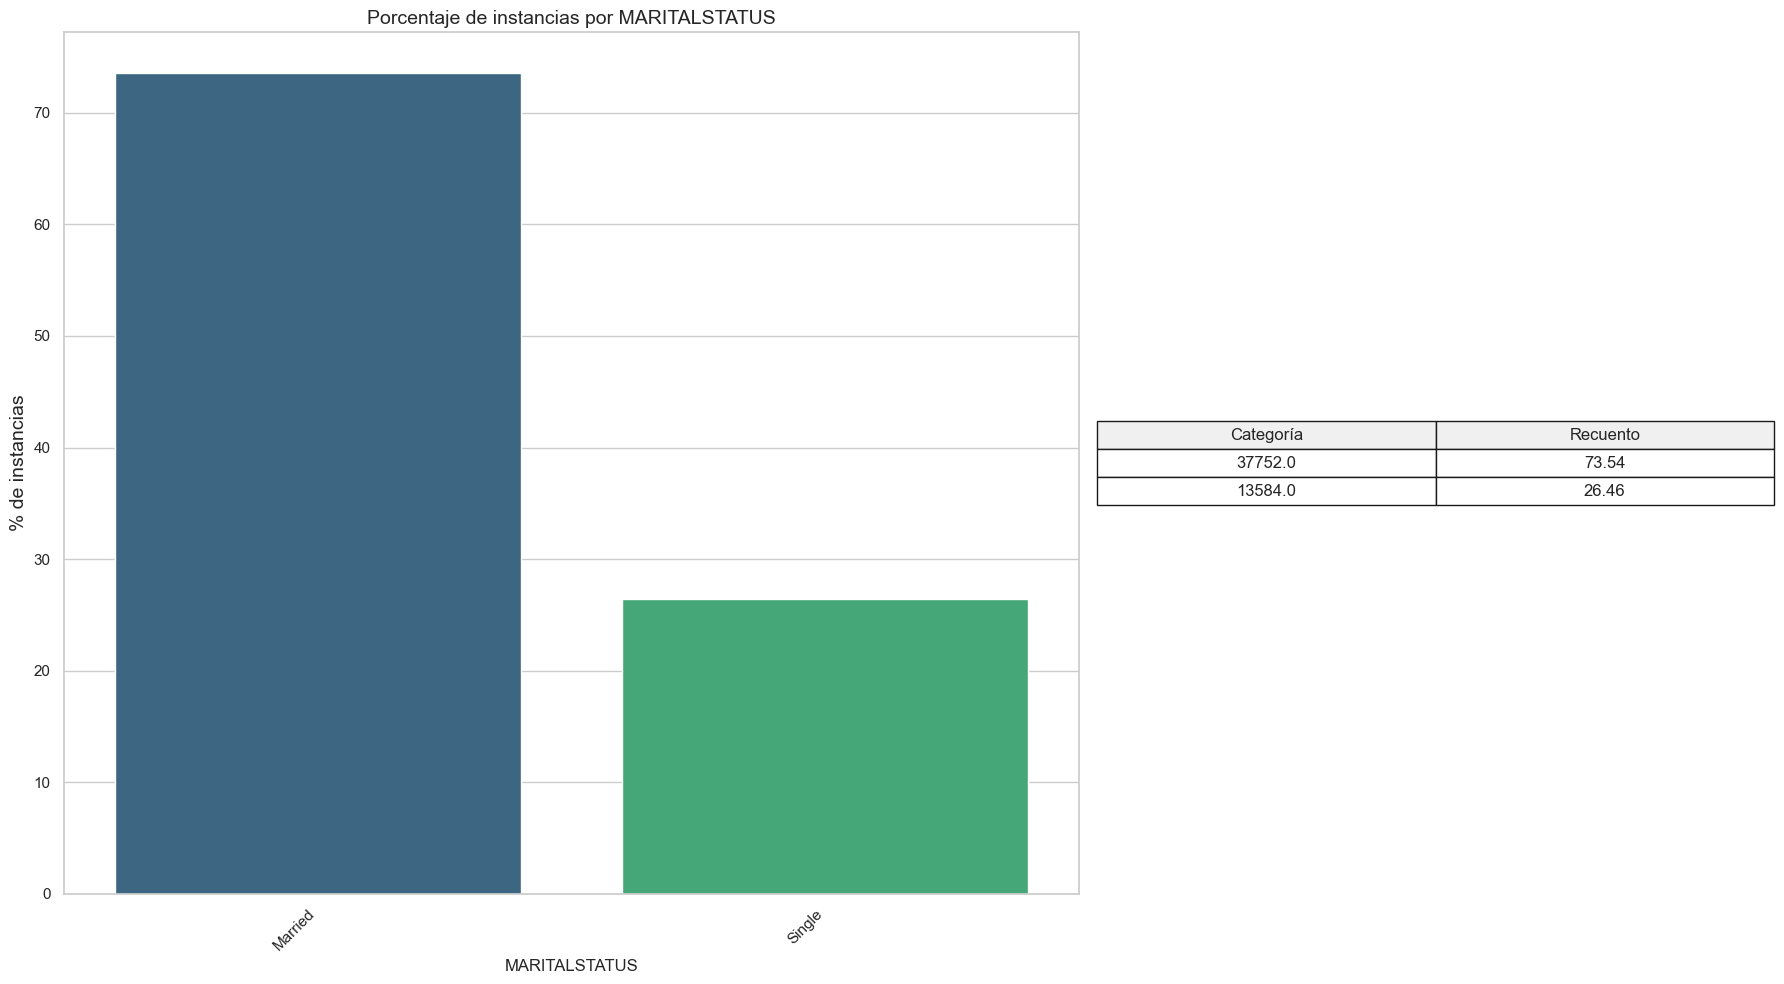

**EDUCATION**

El número de categorías distintas en la variable 'EDUCATION' es 7.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


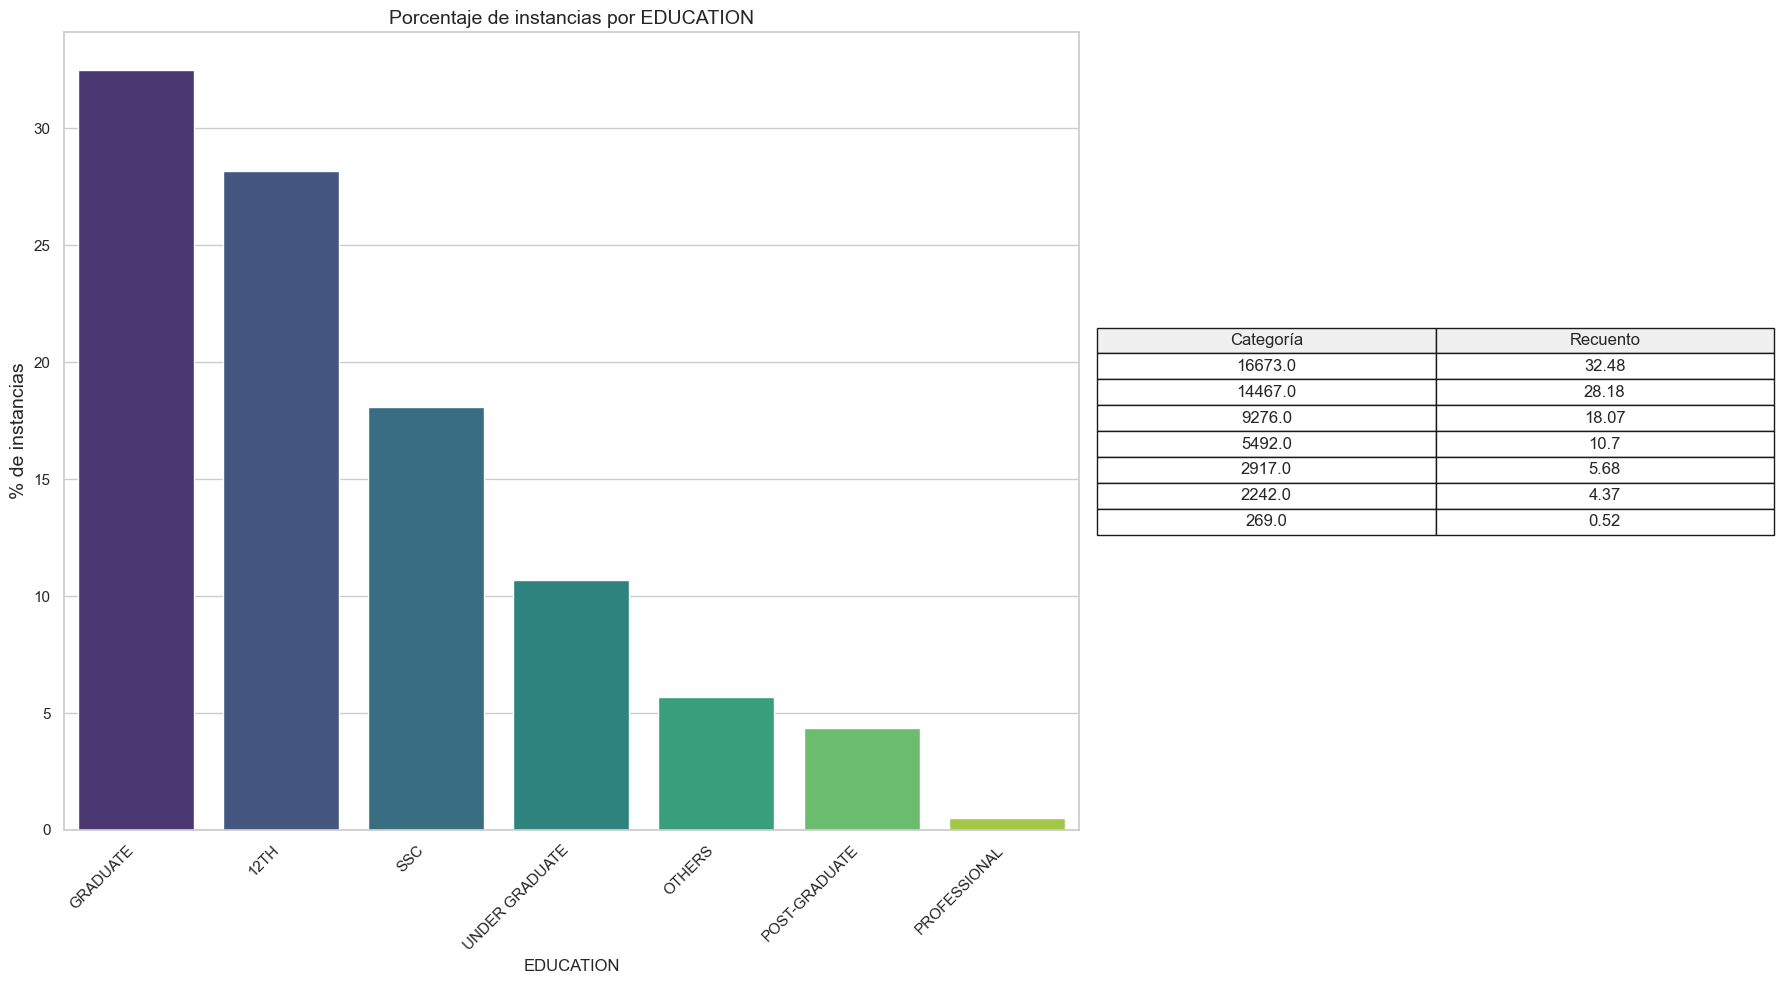

**GENDER**

El número de categorías distintas en la variable 'GENDER' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


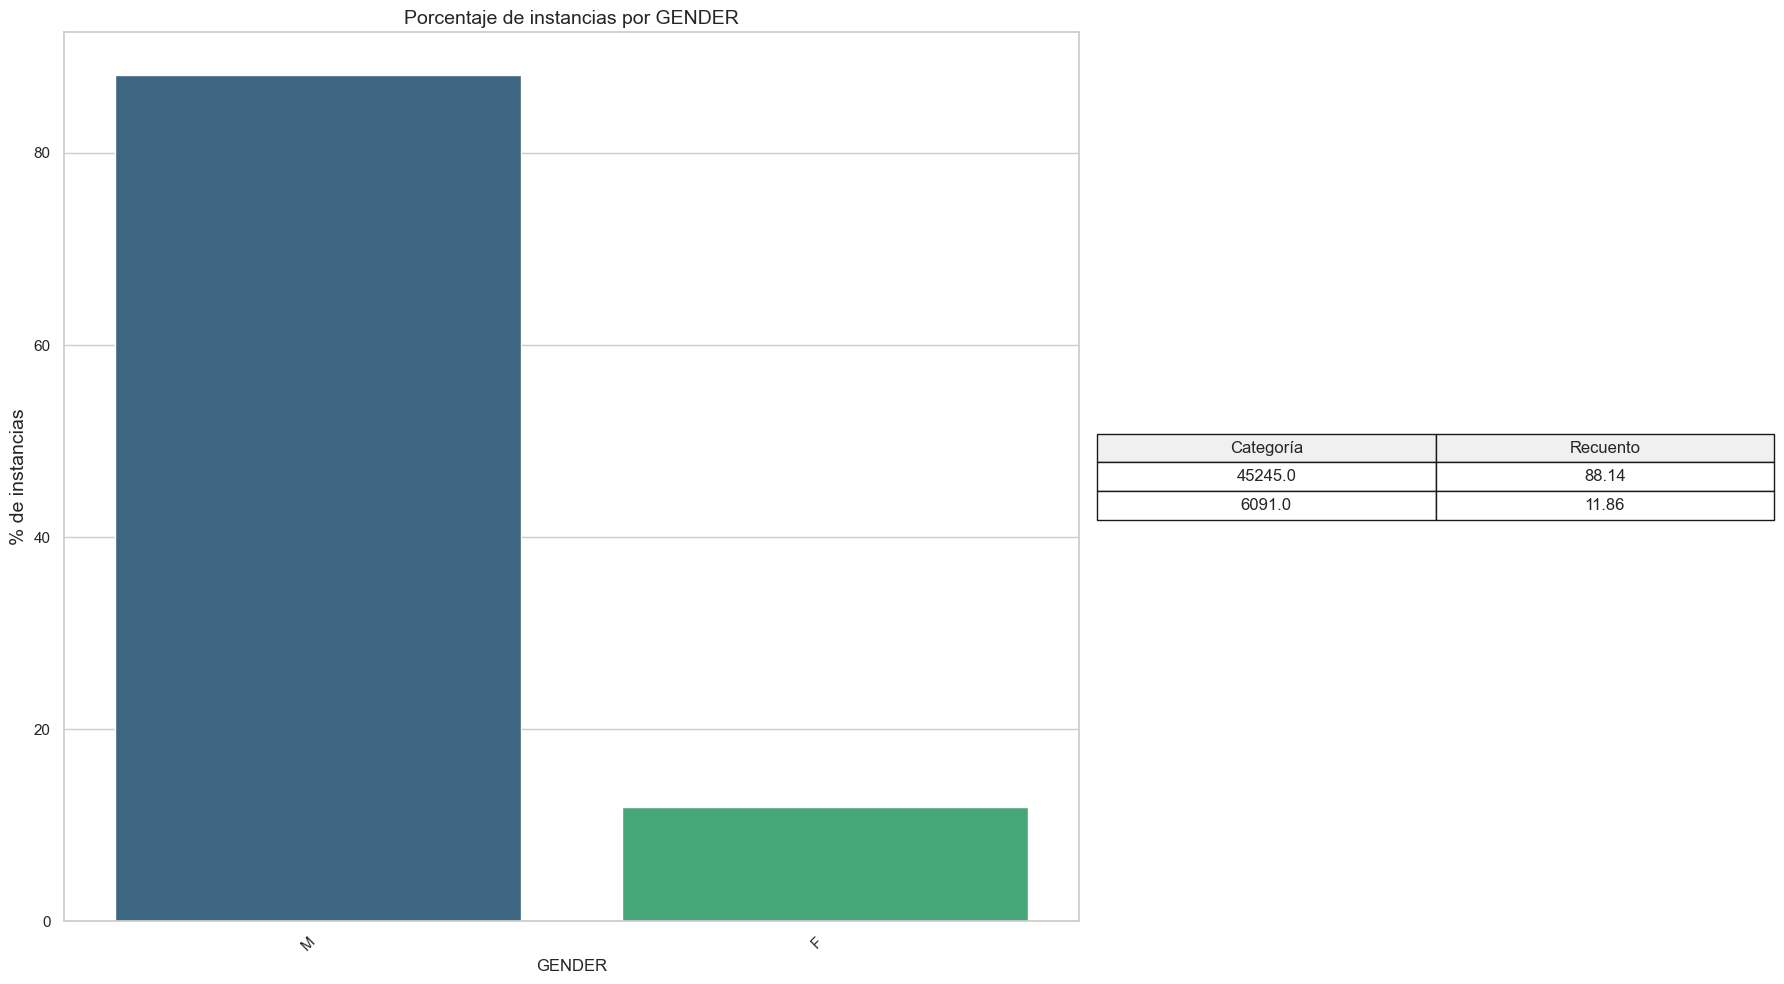

**CC_FLAG**

El número de categorías distintas en la variable 'CC_Flag' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


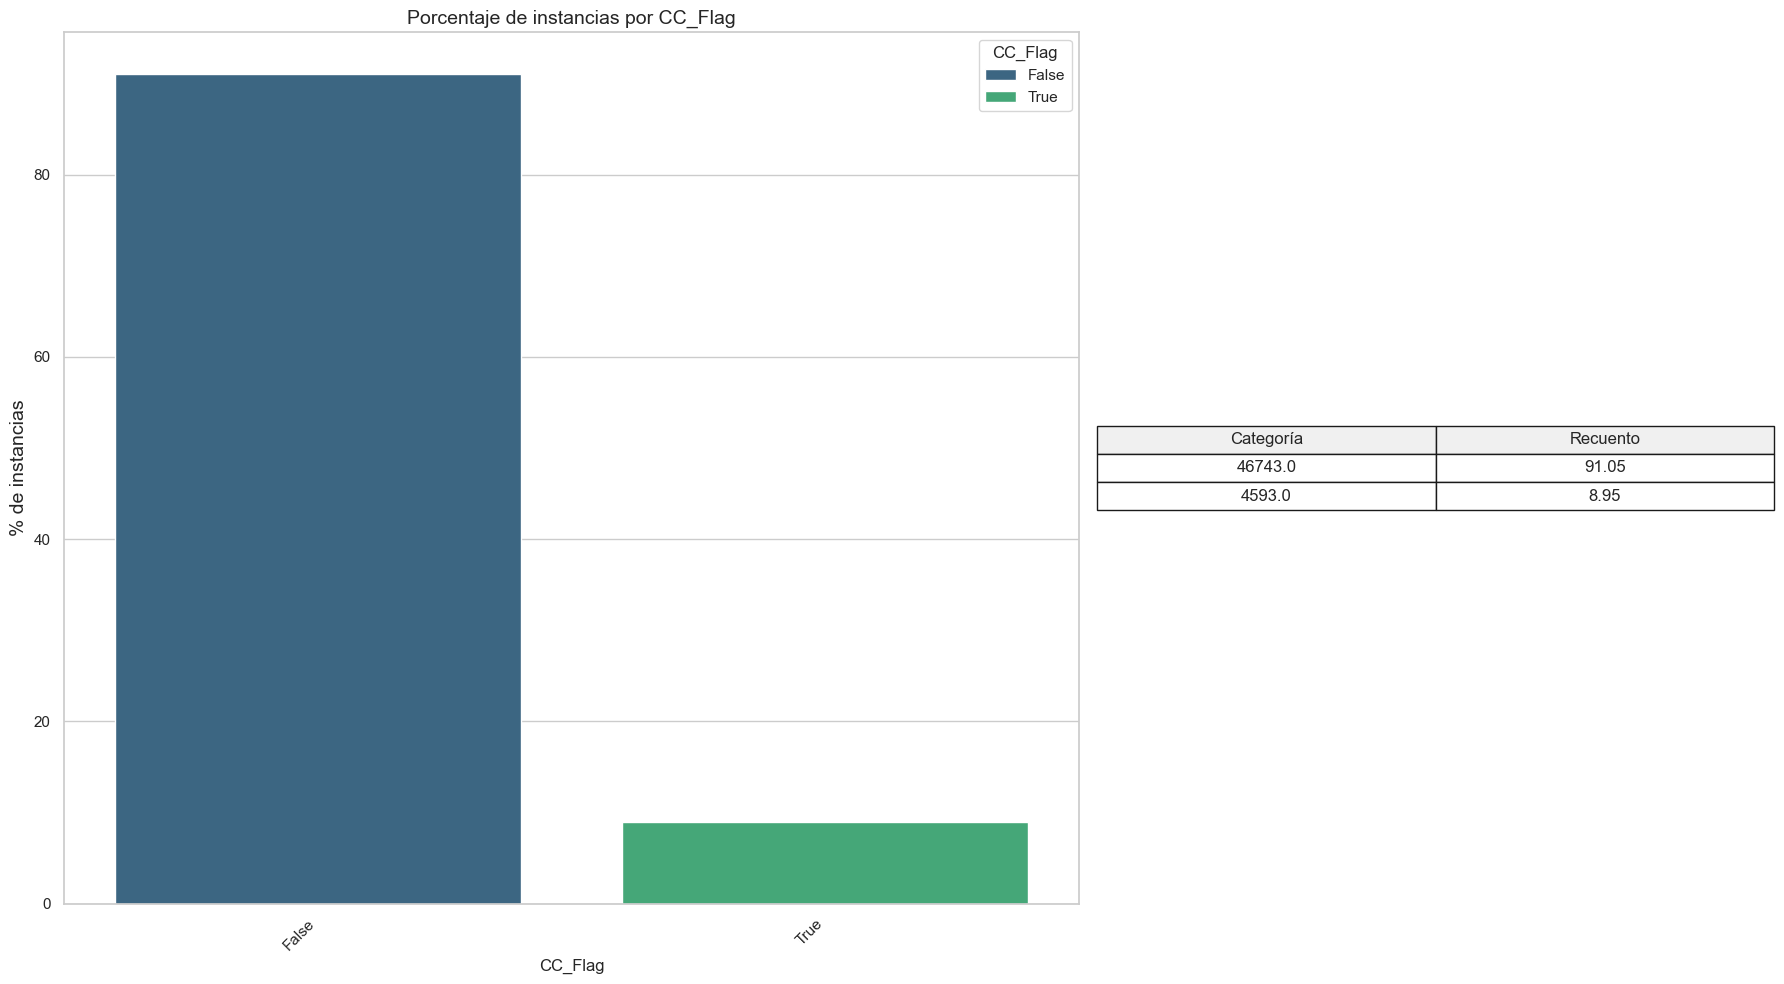

**PL_FLAG**

El número de categorías distintas en la variable 'PL_Flag' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


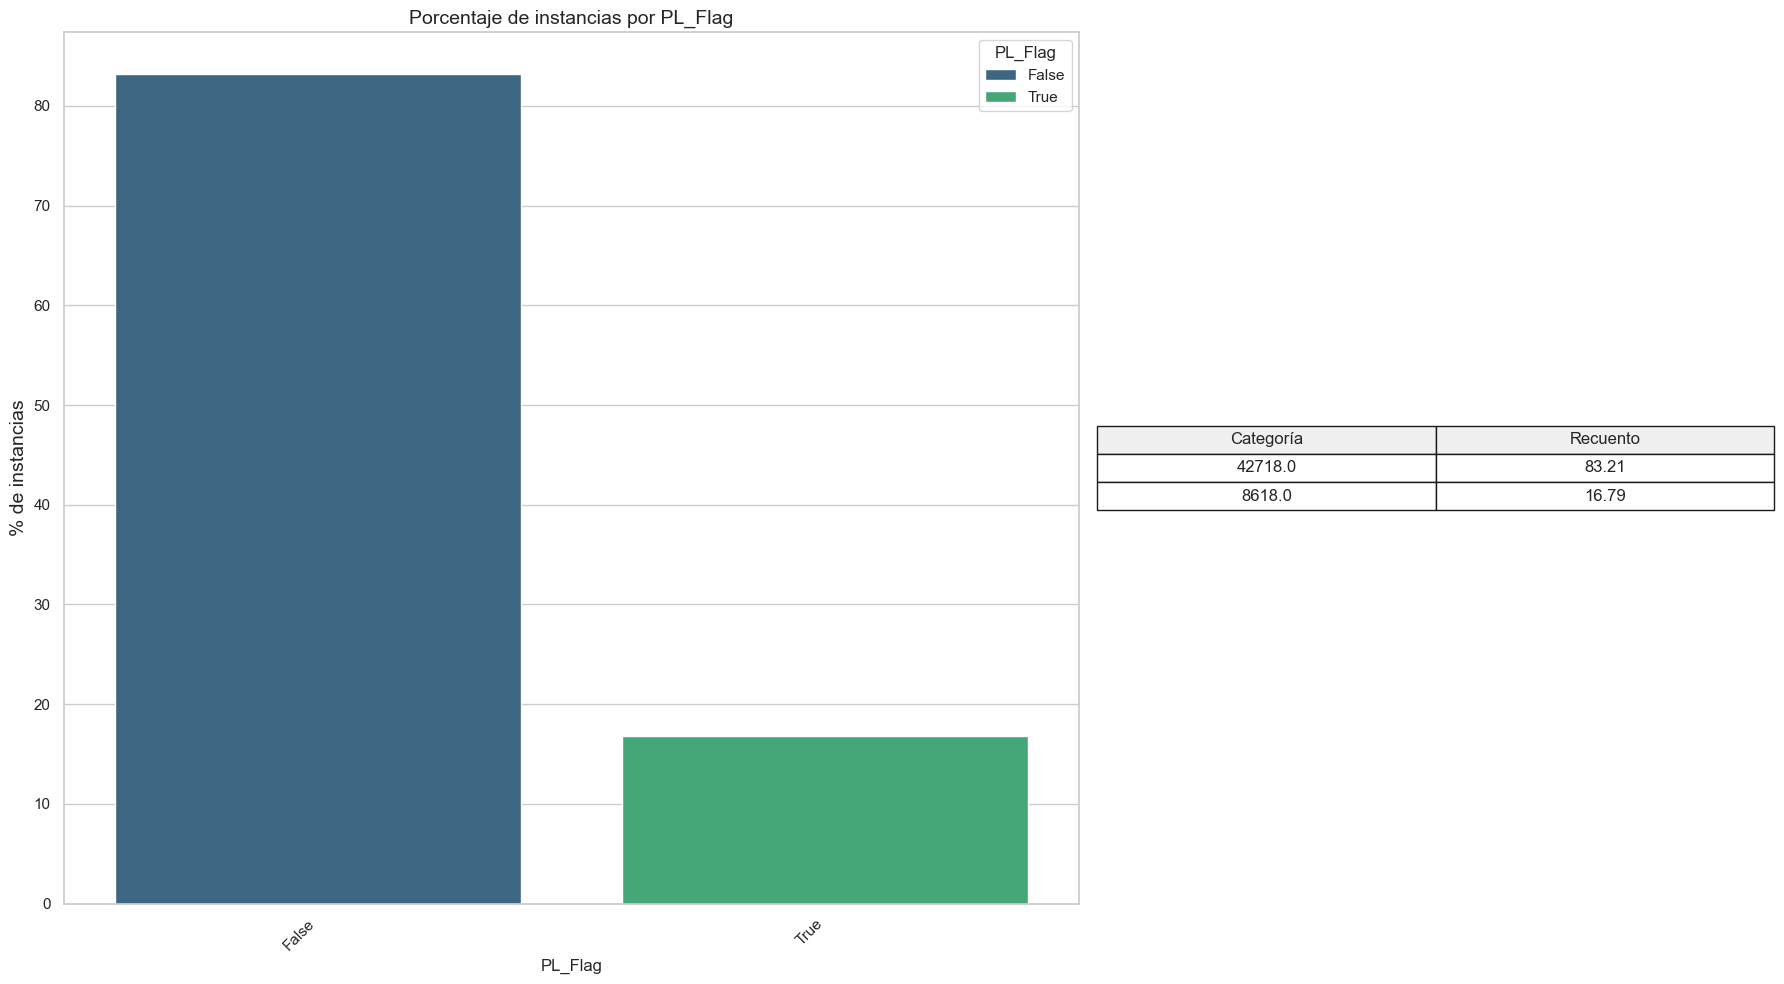

**HL_FLAG**

El número de categorías distintas en la variable 'HL_Flag' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


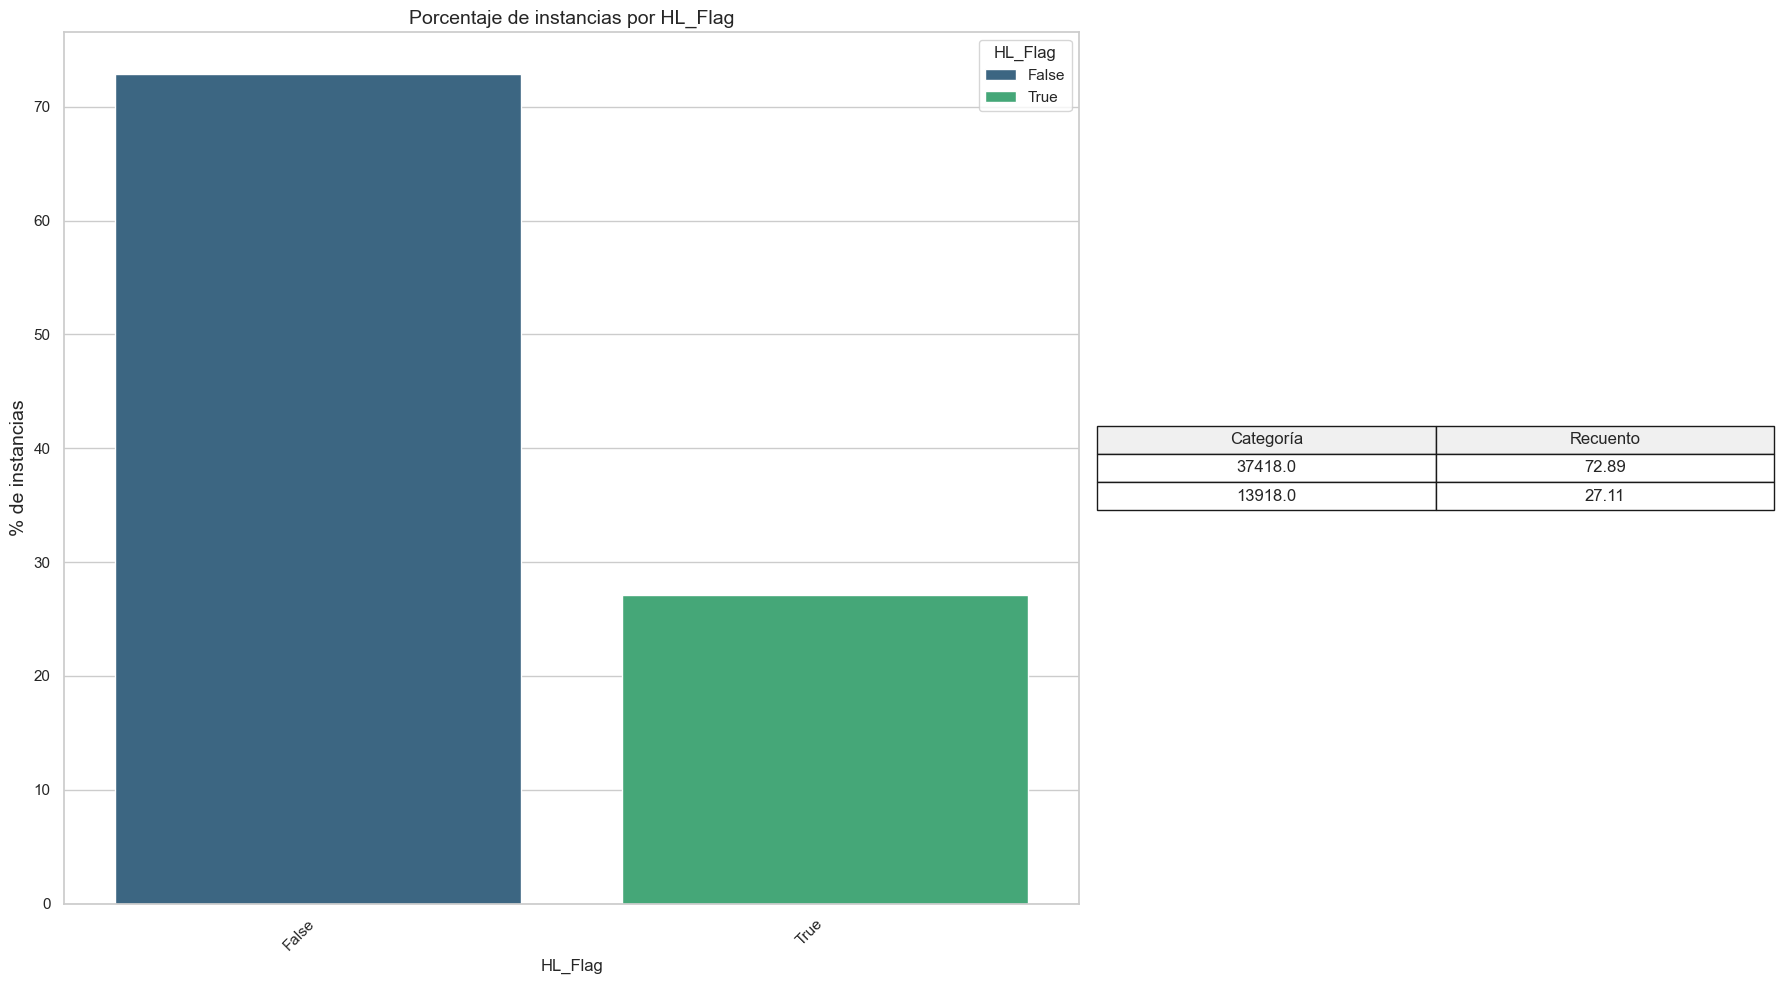

**GL_FLAG**

El número de categorías distintas en la variable 'GL_Flag' es 2.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


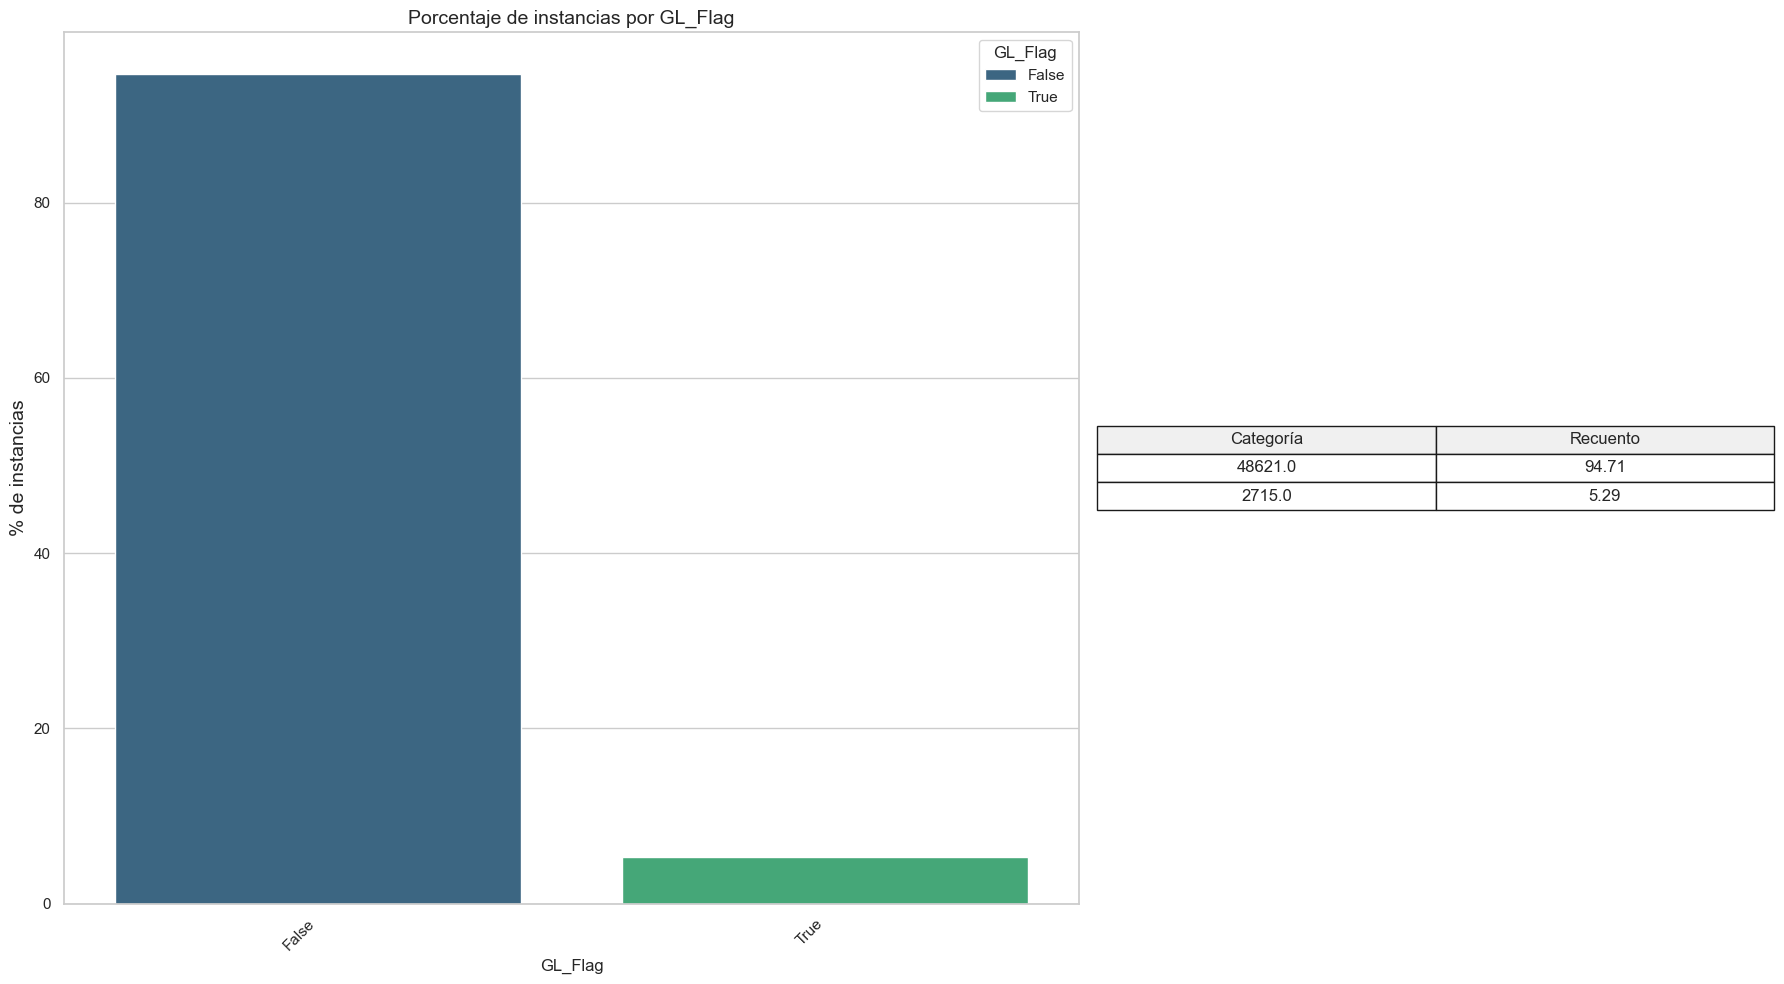

**LAST_PROD_ENQ2**

El número de categorías distintas en la variable 'last_prod_enq2' es 6.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


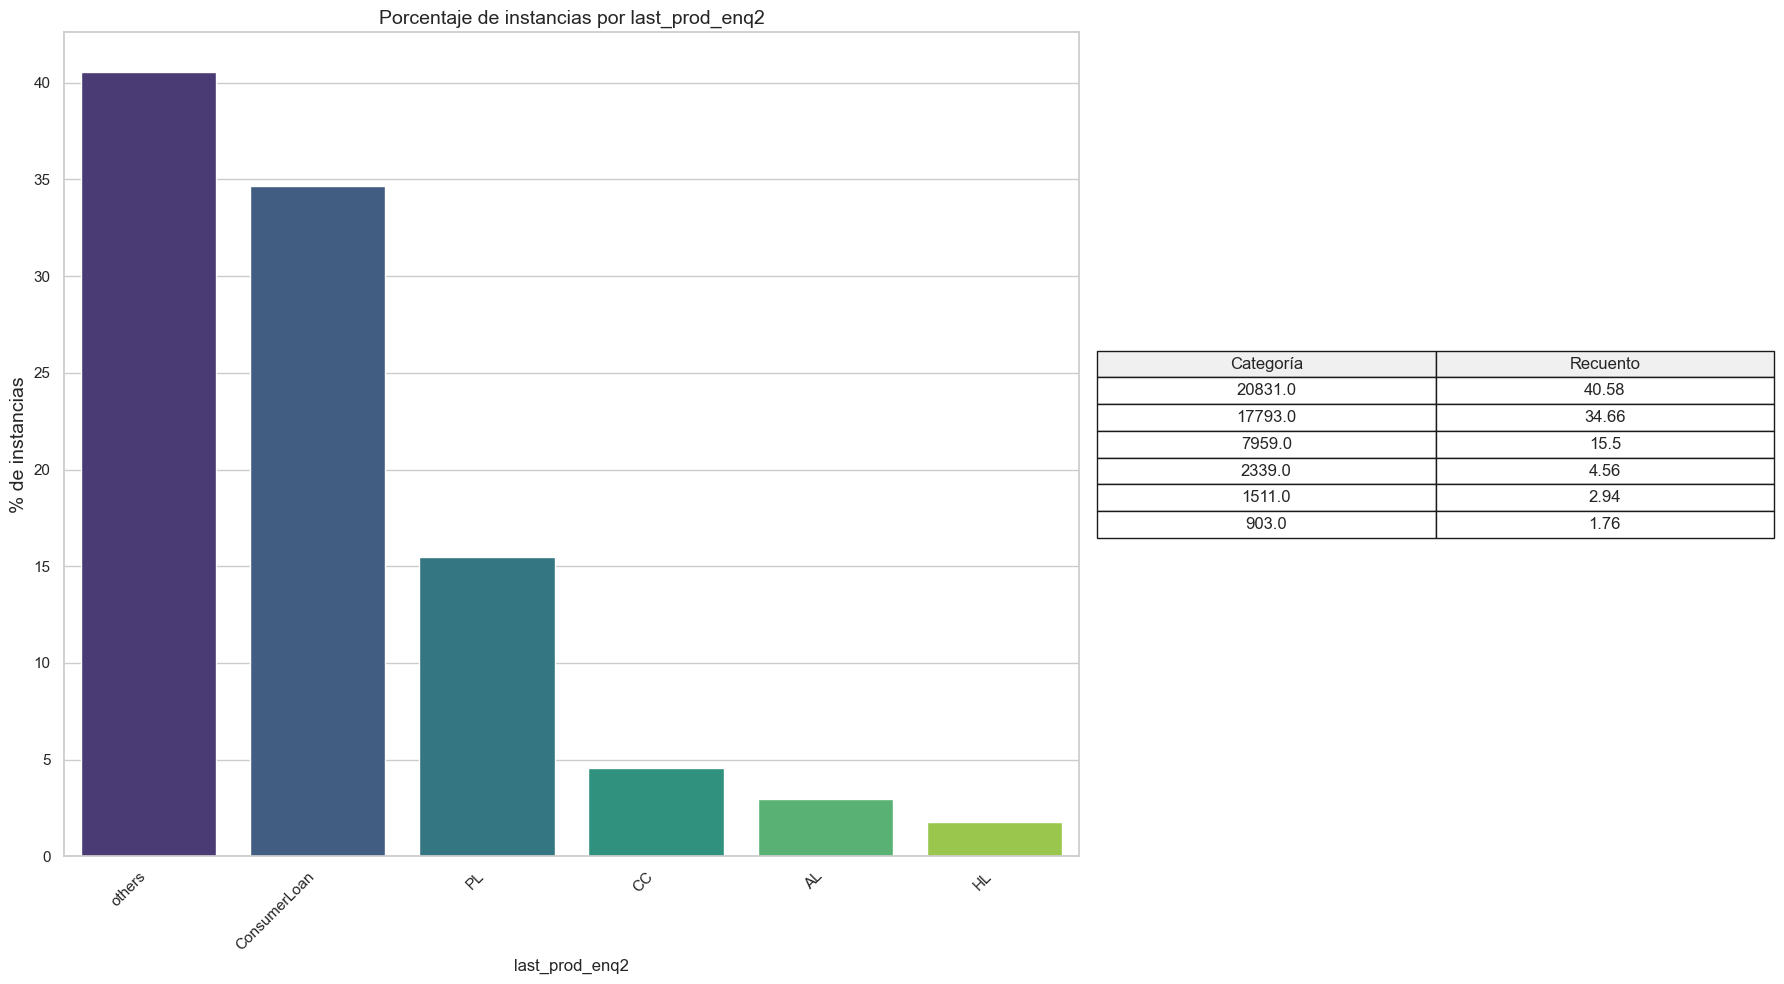

**FIRST_PROD_ENQ2**

El número de categorías distintas en la variable 'first_prod_enq2' es 6.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


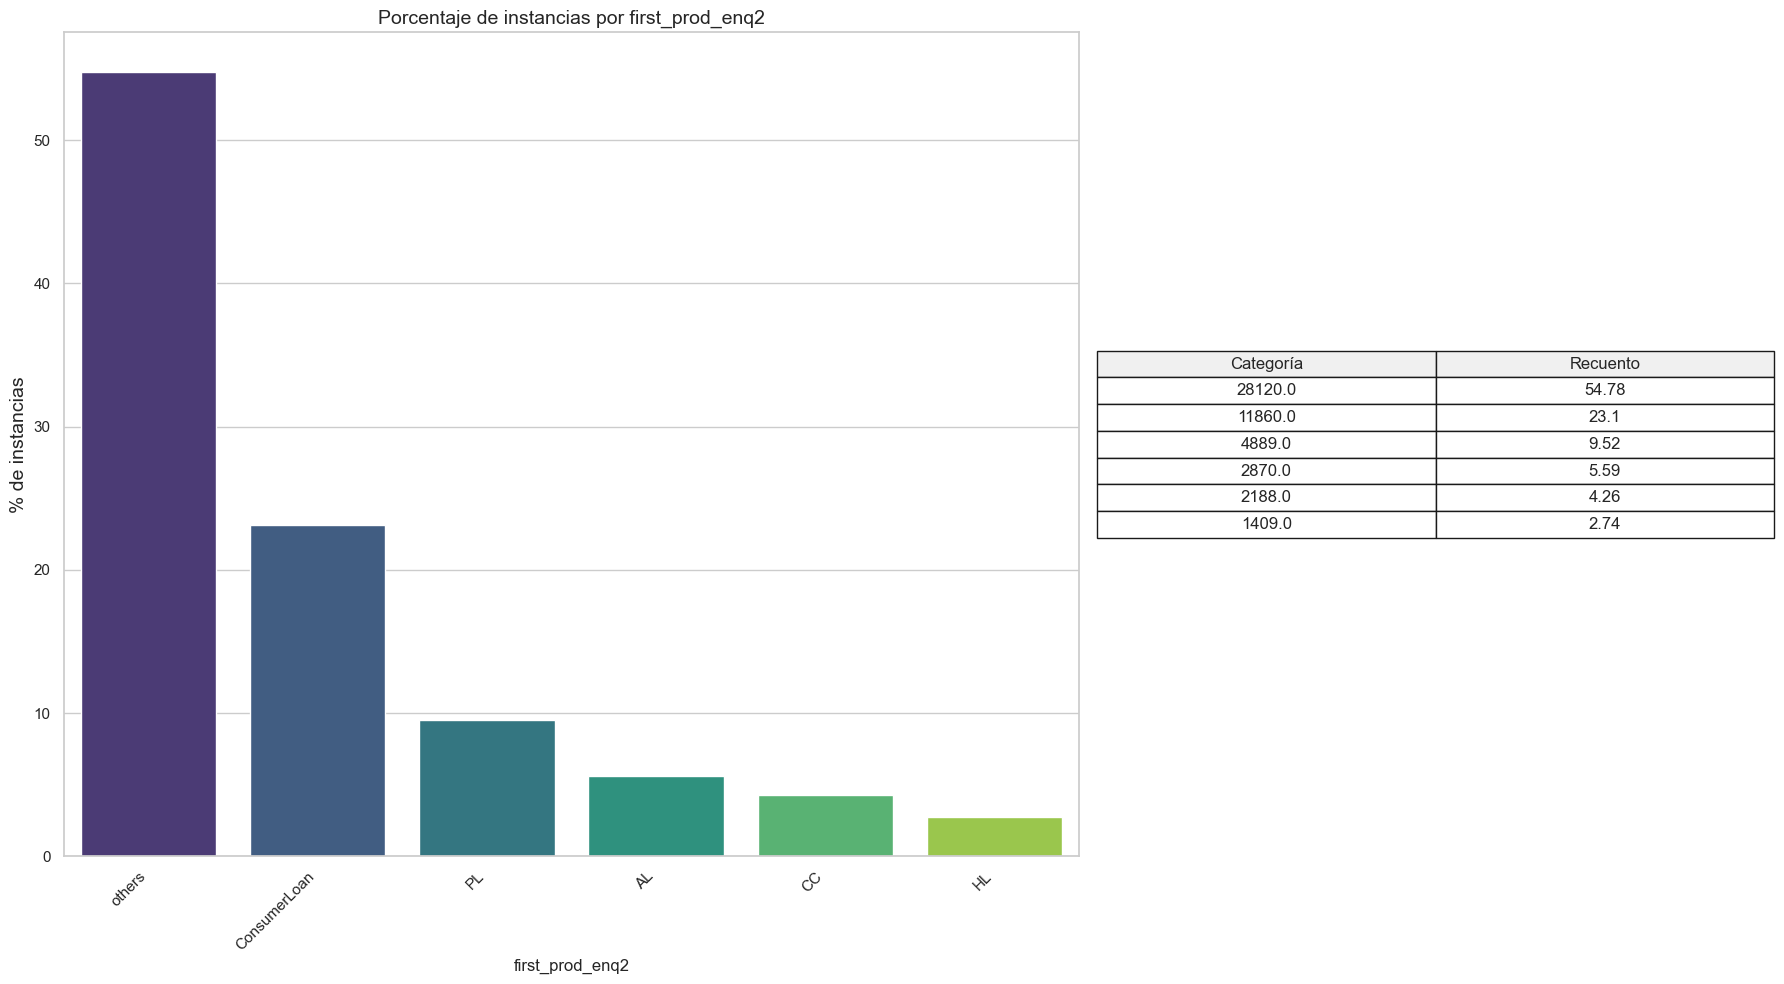

**APPROVED_FLAG**

El número de categorías distintas en la variable 'Approved_Flag' es 4.


C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_17492\25832615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')


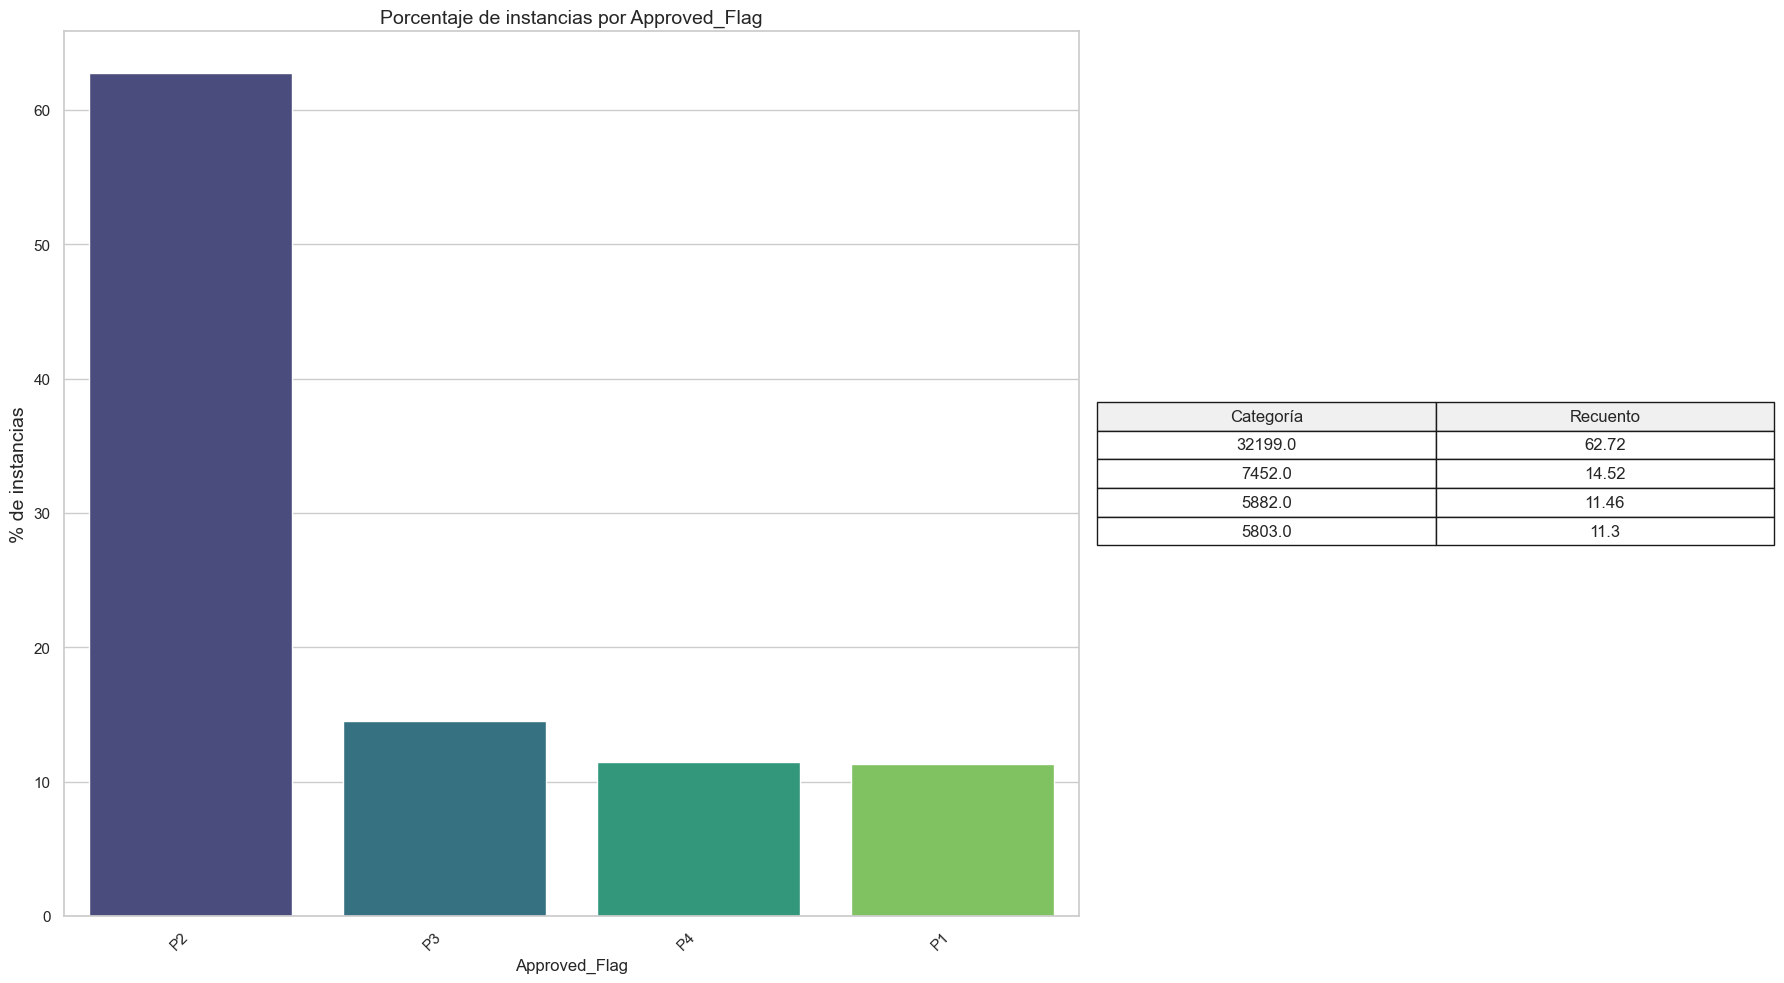

In [159]:
for v_cat in cat_features:
        Count_Cat(external, v_cat)

### 3.2. Variables cuantitativas

En el siguiente código recarcar que se ha aplicado la transformación logaritmica

In [183]:
from matplotlib.ticker import FixedLocator

def Count_Quant(df, quant_feat):
    # Encabezado
    print()
    print()
    formatted_text = f"**{quant_feat.upper()}**"
    try:
        display(Markdown(formatted_text))  # Solo funciona en Jupyter Notebook
    except:
        print(formatted_text)
    
    # Estadísticos descriptivos
    print('Estadísticos:')
    print()
    print(f'Mínimo: {round(df[quant_feat].min(), 2)}')
    print(f'Máximo: {round(df[quant_feat].max(), 2)}')
    print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    print(f'Std.dev %: {round((df[quant_feat].std() / df[quant_feat].mean()) * 100, 2)}%')
    print()
    print(f'Histograma y Boxplot de {quant_feat}.')    

    # Transformación logarítmica
    quant_feat = np.log(df[quant_feat])

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma
    sns.histplot(log_transformed, ax=axes[0], kde=True, color=color)
    axes[0].set_title(f"Histograma de {quant_feat} (log-transformado)")
    axes[0].set_xlabel('')

    # Boxplot horizontal
    sns.boxplot(log_transformed, ax=axes[1], color=color, orient='h')
    axes[1].set_title(f"Boxplot de {quant_feat} (log-transformado)")
    axes[1].set_xlabel('')

    # Etiquetas en escala original con FixedLocator
    ticks = axes[0].get_xticks()
    axes[0].xaxis.set_major_locator(FixedLocator(ticks))
    axes[0].set_xticklabels([round(np.exp(x), 2) for x in ticks])

    ticks = axes[1].get_xticks()
    axes[1].xaxis.set_major_locator(FixedLocator(ticks))
    axes[1].set_xticklabels([round(np.exp(x), 2) for x in ticks])

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()


In [173]:
external.describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  51336.000000               51336.000000          51336.000000   
mean   25668.500000                 230.929523              1.573749   
std    14819.571046                 452.574324              4.165012   
min        1.000000                   0.000000              0.000000   
25%    12834.750000                  48.000000              0.000000   
50%    25668.500000                  70.000000              0.000000   
75%    38502.250000                 163.000000              1.000000   
max    51336.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count               51336.000000    51336.000000     51336.000000   
mean                   13.521953        0.184977         0.480053   
std                    53.336976        0.710240         1.522210   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                    10.000000        0.000000         0.000000   
max                   900.000000       12.000000        28.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd       num_std  \
count       51336.000000       51336.000000       51336.000000  51336.000000   
mean            0.295076           0.728884           0.426971      9.204671   
std             1.027471           2.762120           2.101404     21.308881   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           0.000000      0.000000   
75%             0.000000           0.000000           0.000000      9.000000   
max            20.000000          60.000000          52.000000    422.000000   

       num_std_6mts  num_std_12mts       num_sub  num_sub_6mts  num_sub_12mts  \
count  51336.000000   51336.000000  51336.000000  51336.000000   51336.000000   
mean       1.484027       3.319444      0.062646      0.002435       0.009292   
std        3.364581       7.518414      0.801218      0.091383       0.233403   
min        0.000000       0.000000      0.000000      0.000000       0.000000   
25%        0.000000       0.000000      0.000000      0.000000       0.000000   
50%        0.000000       0.000000      0.000000      0.000000       0.000000   
75%        1.000000       3.000000      0.000000      0.000000       0.000000   
max       60.000000     122.000000     42.000000      8.000000      20.000000   

            num_dbt  num_dbt_6mts  num_dbt_12mts       num_lss  num_lss_6mts  \
count  51336.000000  51336.000000   51336.000000  51336.000000  51336.000000   
mean       0.025947      0.001208       0.004130      0.015097      0.000974   
std        0.635611      0.070331       0.179885      0.529730      0.075413   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        0.000000      0.000000       0.000000      0.000000      0.000000   
max       35.000000      6.000000      12.000000     72.000000     12.000000   

       num_lss_12mts  recent_level_of_deliq       tot_enq        CC_enq  \
count   51336.000000           51336.000000  51336.000000  51336.000000   
mean        0.002844              11.266090      4.762681      0.409732   
std         0.185349              46.100309      5.954877      1.568486   
min         0.000000               0.000000      1.000000      0.000000   
25%         0.000000               0.000000      1.000000      0.000000   
50%         0.000000               0.000000      3.000000      0.000000   
75%         0.000000               7.0000

Estadísticos:

Mínimo: 0
Máximo: 12
Promedio: 0.0
Std.dev %: 7742.84%

Histograma y Boxplot de num_lss_6mts.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


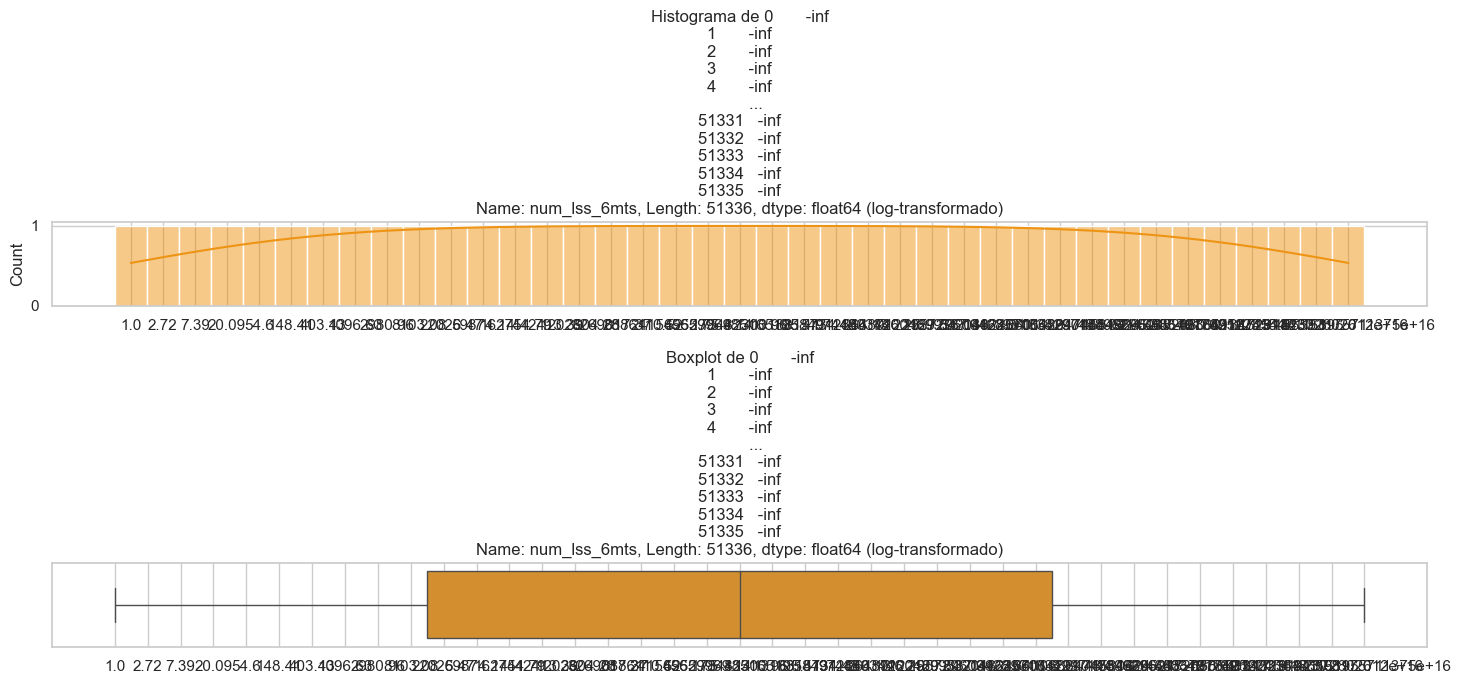

**NUM_LSS_12MTS**

Estadísticos:

Mínimo: 0
Máximo: 30
Promedio: 0.0
Std.dev %: 6517.19%

Histograma y Boxplot de num_lss_12mts.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


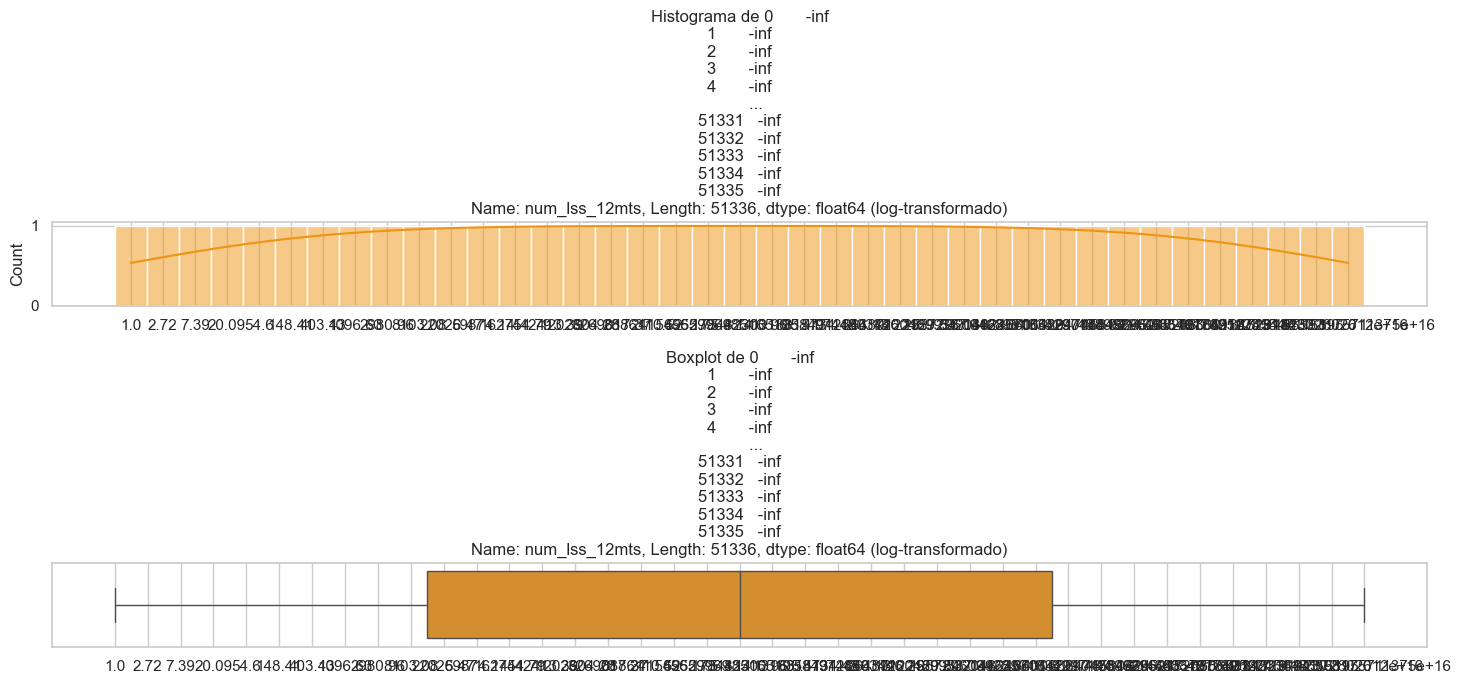

**RECENT_LEVEL_OF_DELIQ**

Estadísticos:

Mínimo: 0
Máximo: 900
Promedio: 11.27
Std.dev %: 409.2%

Histograma y Boxplot de recent_level_of_deliq.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


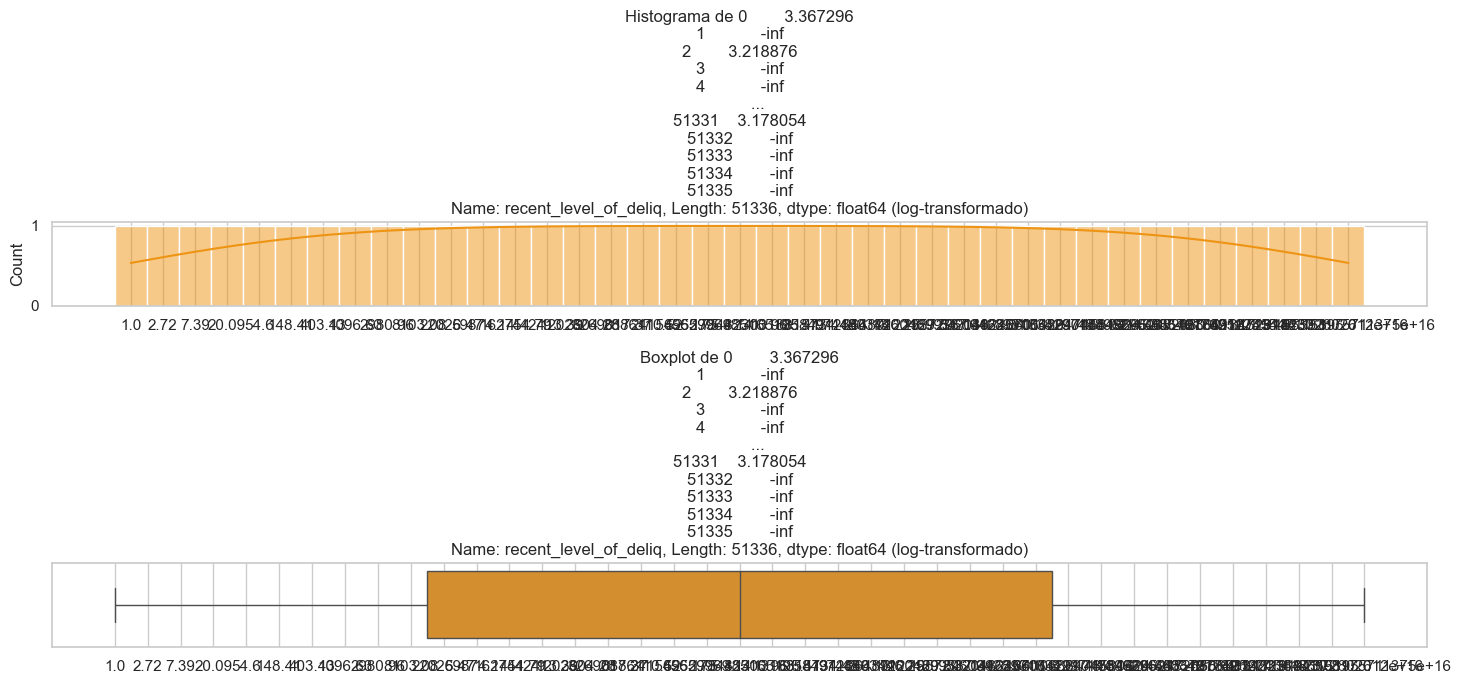

**TOT_ENQ**

Estadísticos:

Mínimo: 1
Máximo: 176
Promedio: 4.76
Std.dev %: 125.03%

Histograma y Boxplot de tot_enq.


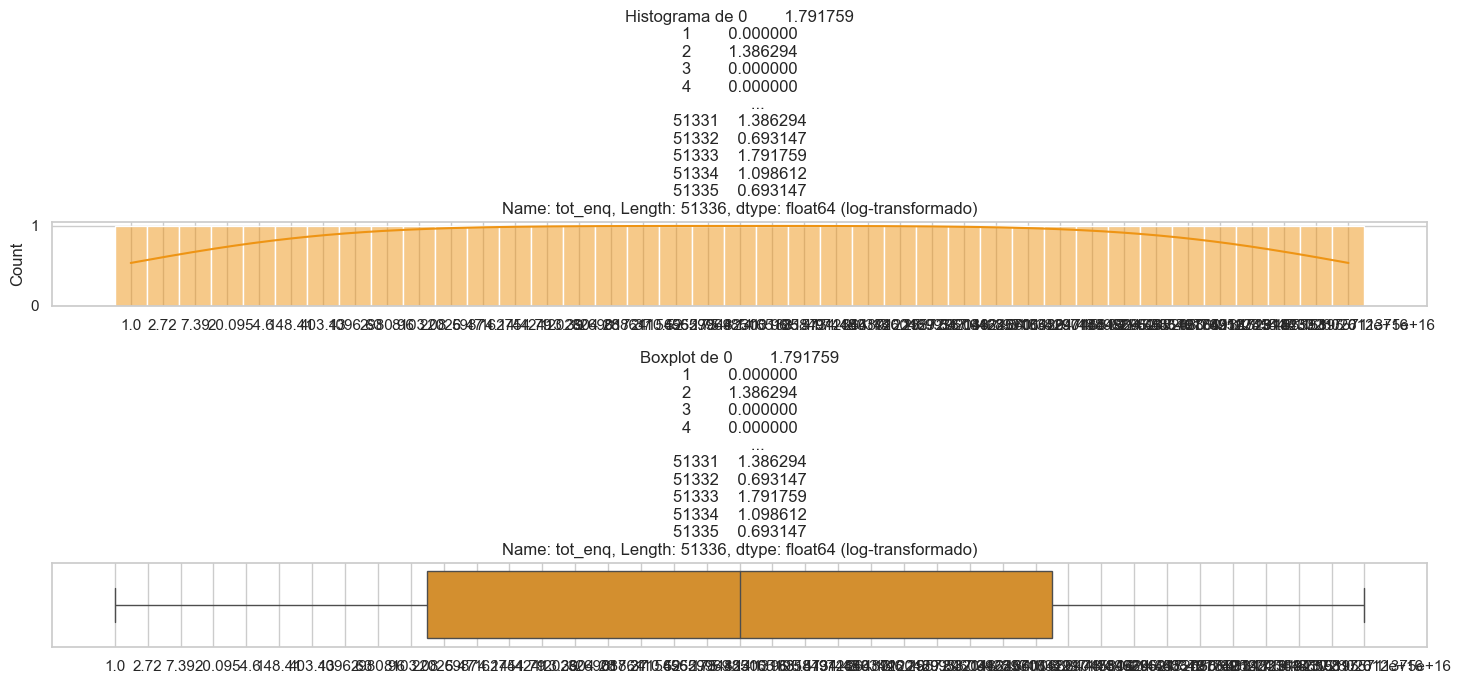

**CC_ENQ**

Estadísticos:

Mínimo: 0
Máximo: 42
Promedio: 0.41
Std.dev %: 382.81%

Histograma y Boxplot de CC_enq.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


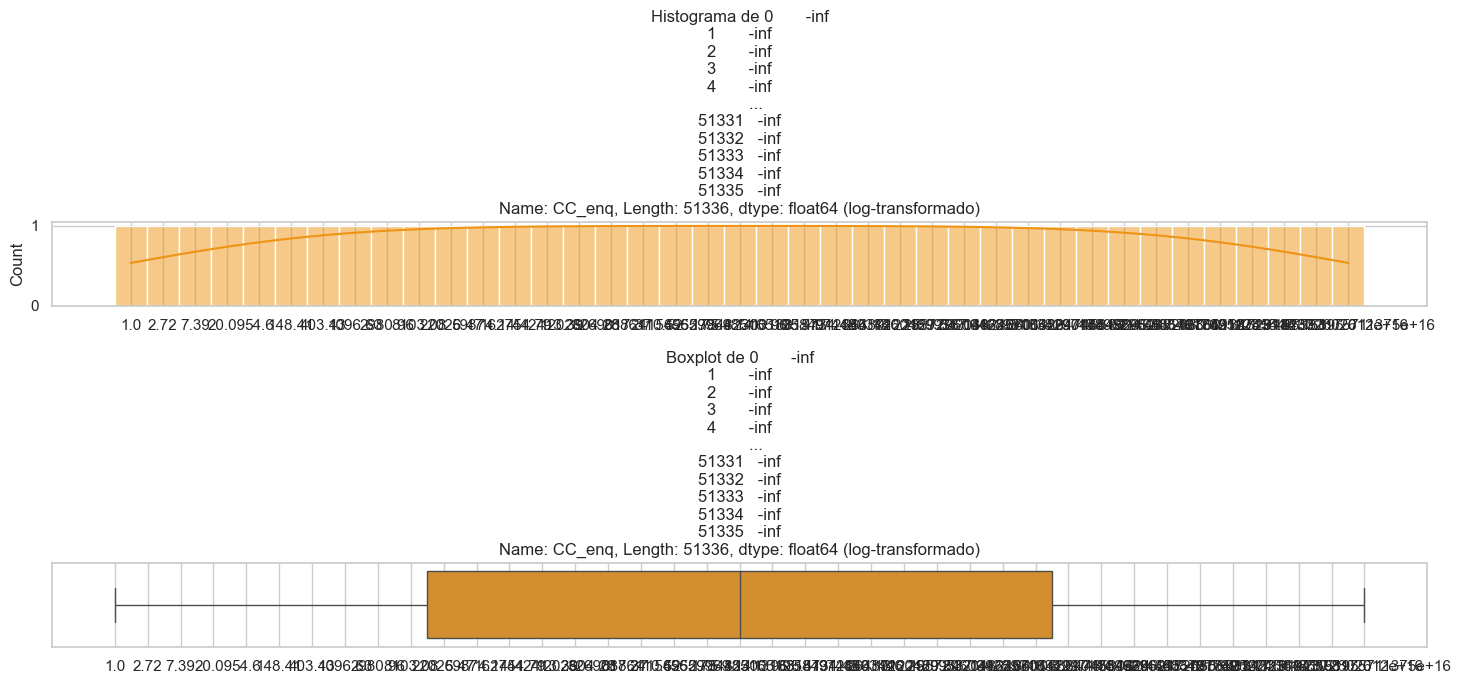

**CC_ENQ_L6M**

Estadísticos:

Mínimo: 0
Máximo: 17
Promedio: 0.14
Std.dev %: 453.89%

Histograma y Boxplot de CC_enq_L6m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


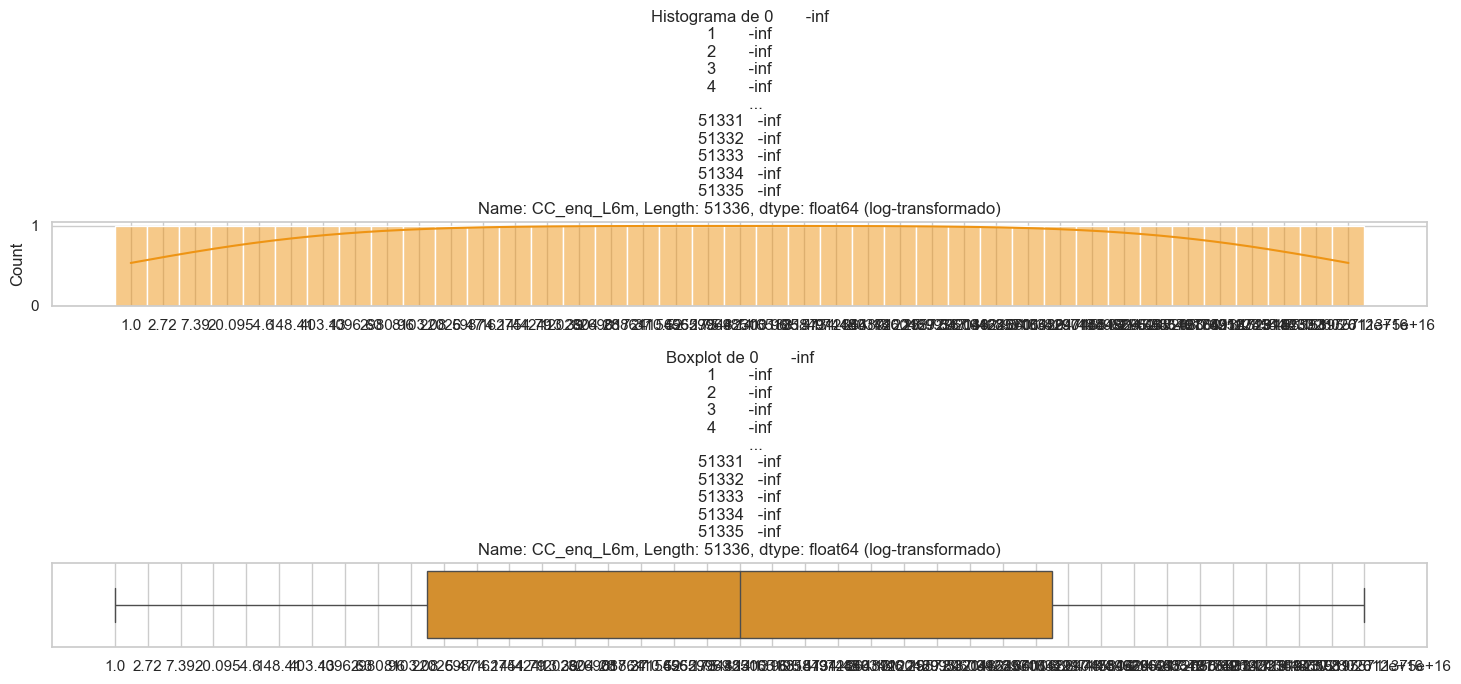

**CC_ENQ_L12M**

Estadísticos:

Mínimo: 0
Máximo: 24
Promedio: 0.23
Std.dev %: 410.69%

Histograma y Boxplot de CC_enq_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


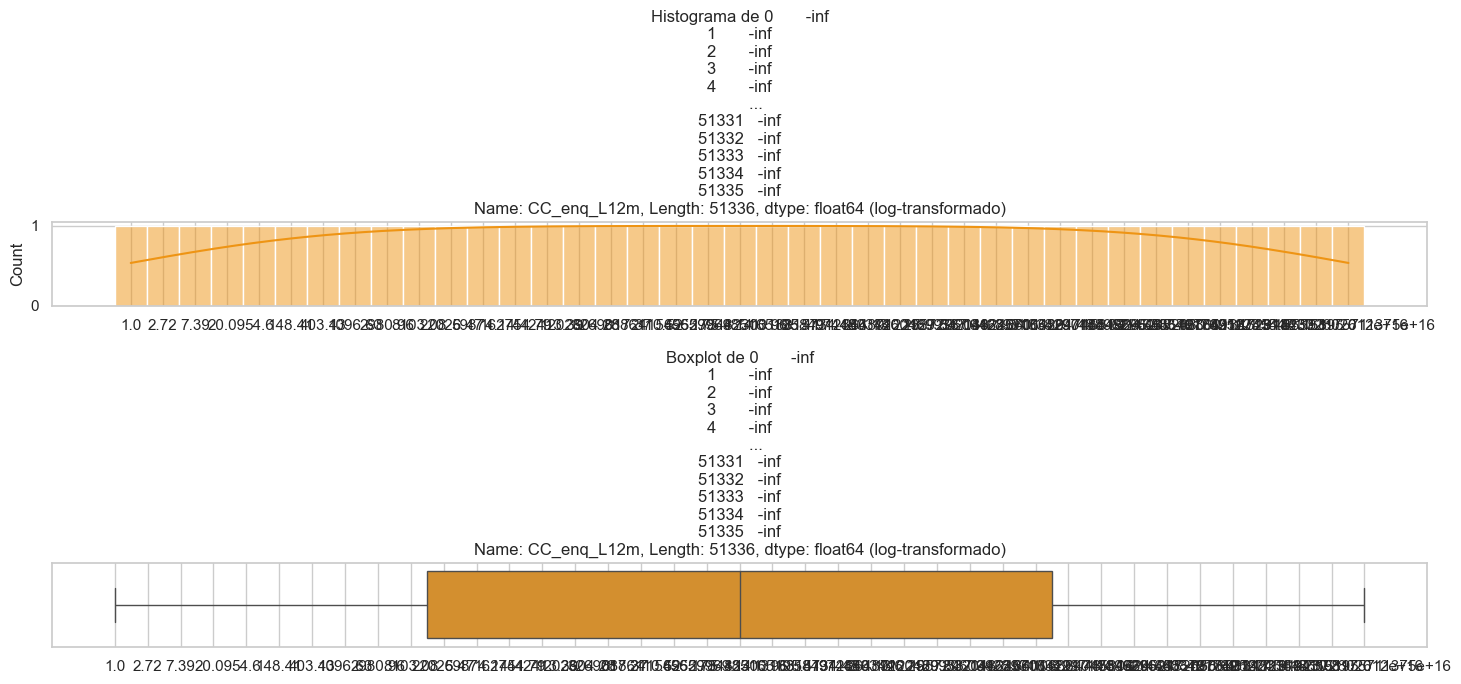

**PL_ENQ**

Estadísticos:

Mínimo: 0
Máximo: 46
Promedio: 1.0
Std.dev %: 222.43%

Histograma y Boxplot de PL_enq.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


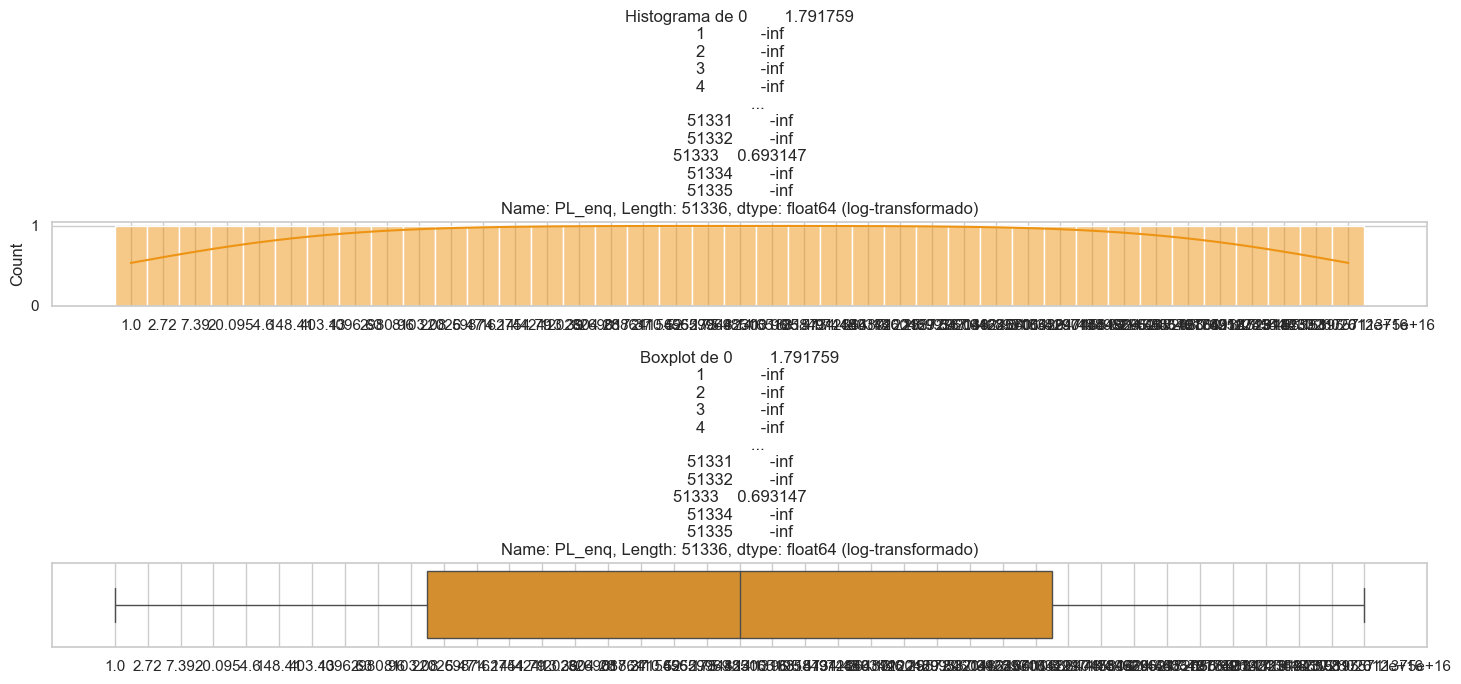

**PL_ENQ_L6M**

Estadísticos:

Mínimo: 0
Máximo: 44
Promedio: 0.44
Std.dev %: 287.72%

Histograma y Boxplot de PL_enq_L6m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


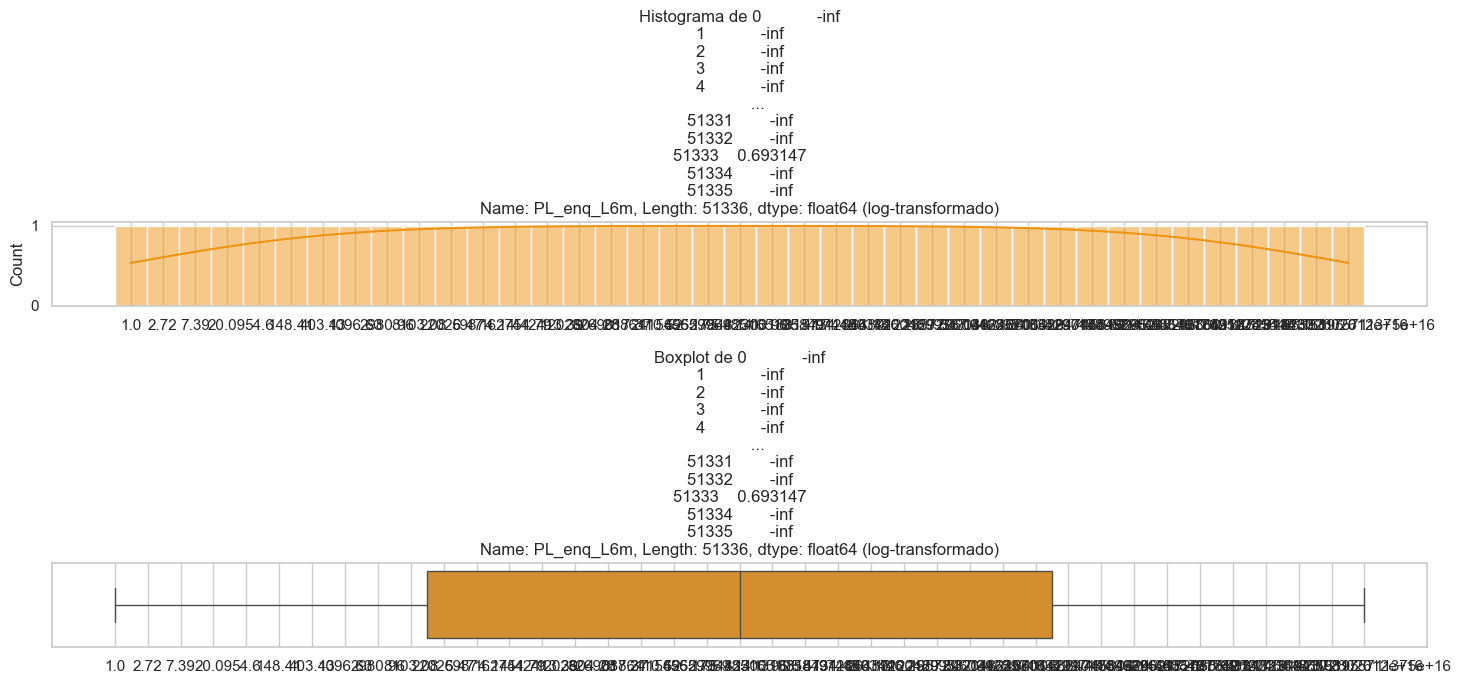

**PL_ENQ_L12M**

Estadísticos:

Mínimo: 0
Máximo: 44
Promedio: 0.66
Std.dev %: 252.22%

Histograma y Boxplot de PL_enq_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


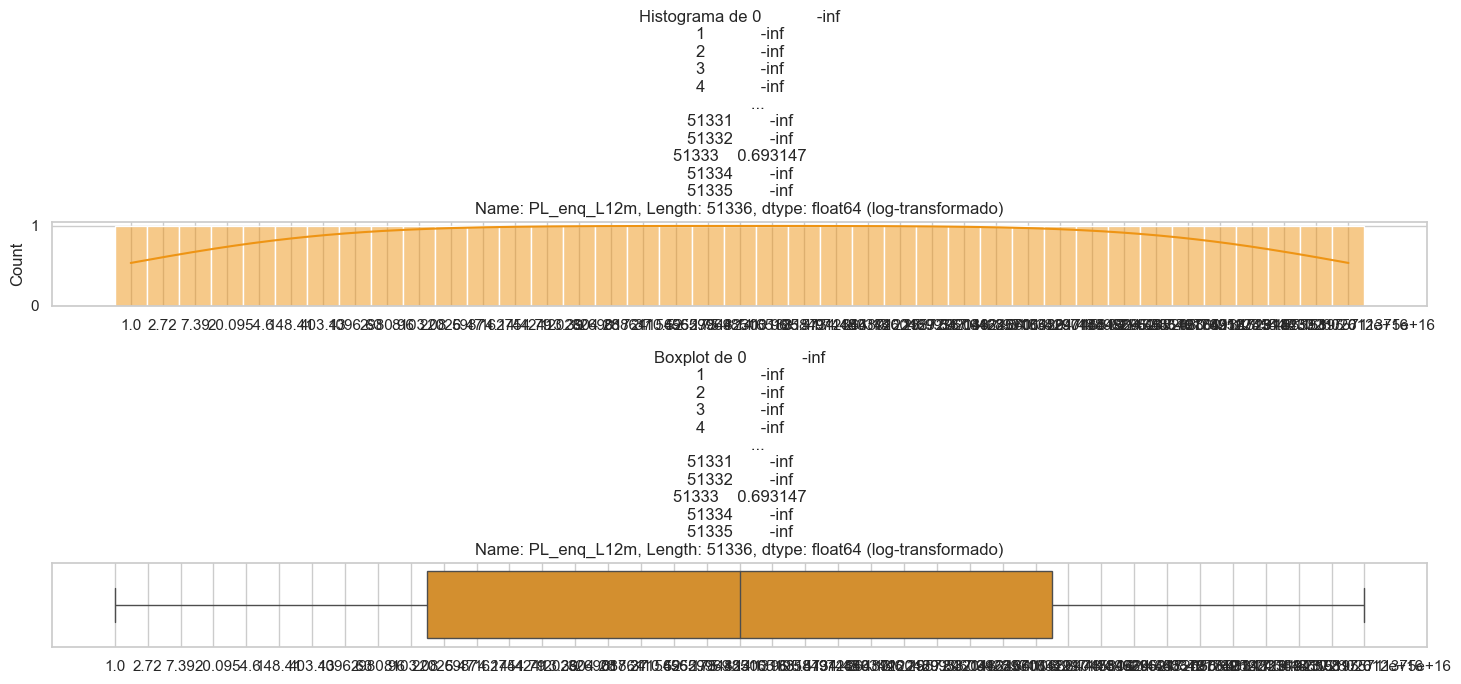

**TIME_SINCE_RECENT_ENQ**

Estadísticos:

Mínimo: 0
Máximo: 4768
Promedio: 228.03
Std.dev %: 193.4%

Histograma y Boxplot de time_since_recent_enq.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


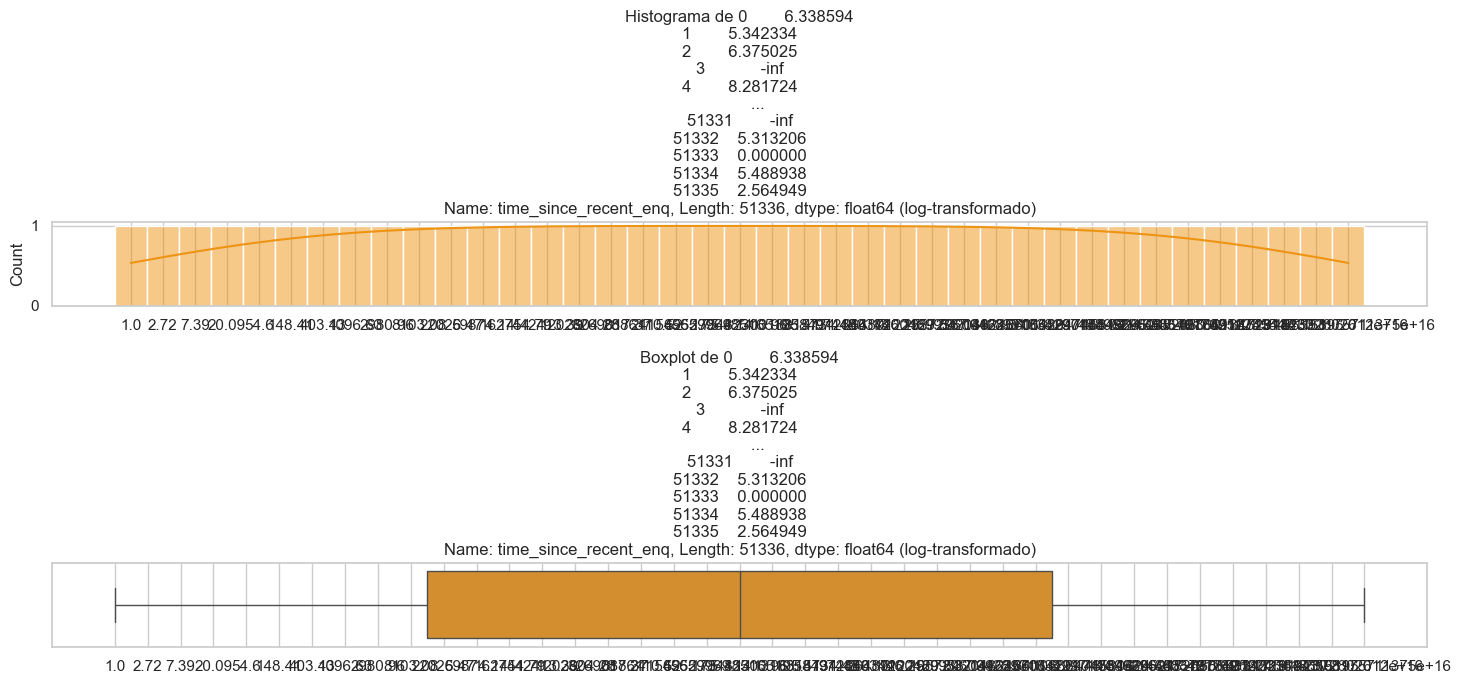

**ENQ_L12M**

Estadísticos:

Mínimo: 0
Máximo: 87
Promedio: 2.64
Std.dev %: 154.24%

Histograma y Boxplot de enq_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


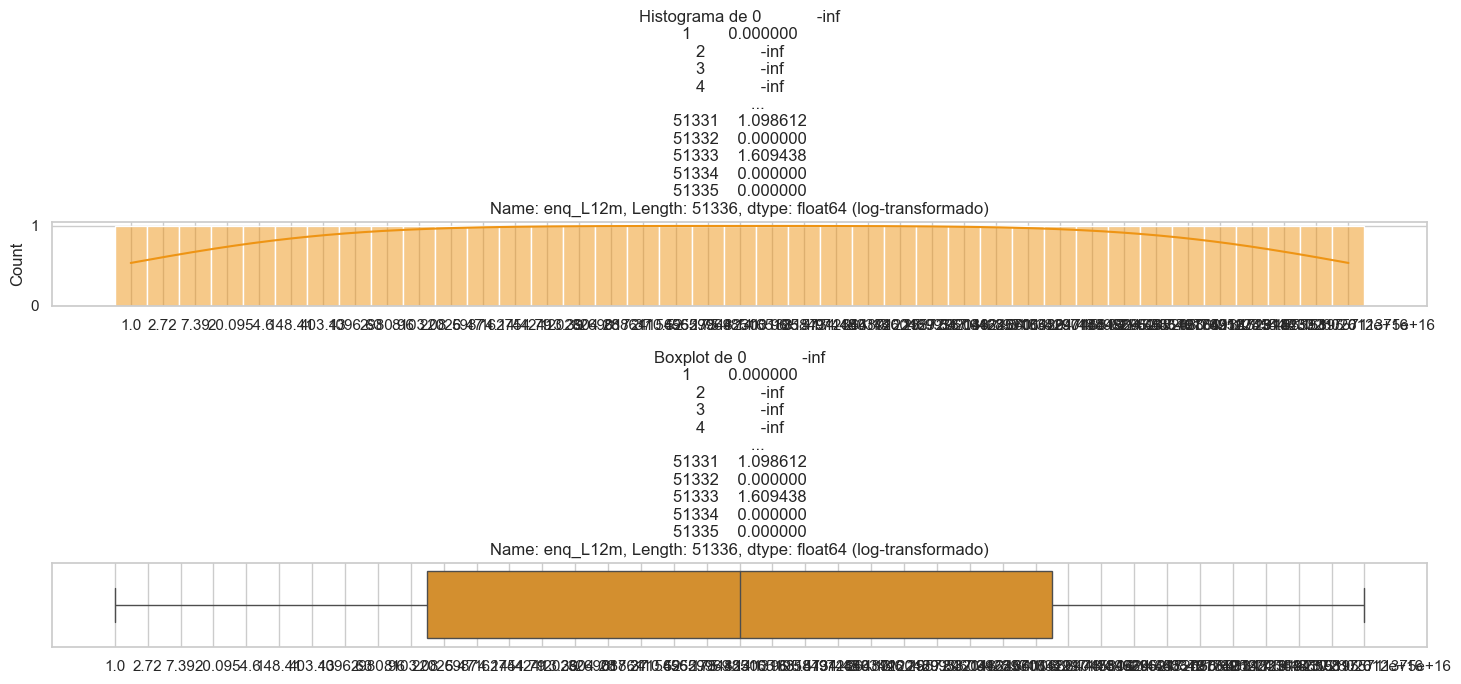

**ENQ_L6M**

Estadísticos:

Mínimo: 0
Máximo: 66
Promedio: 1.75
Std.dev %: 171.23%

Histograma y Boxplot de enq_L6m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


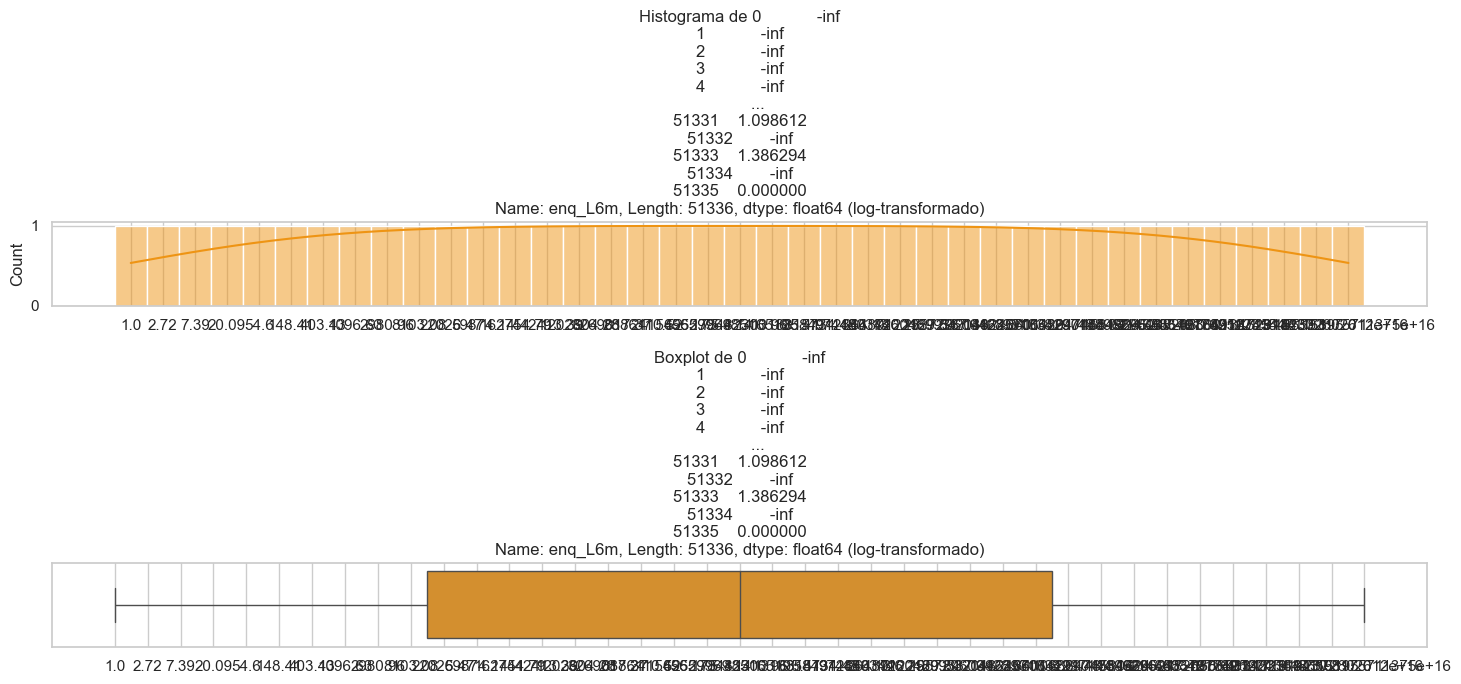

**ENQ_L3M**

Estadísticos:

Mínimo: 0
Máximo: 42
Promedio: 1.09
Std.dev %: 181.35%

Histograma y Boxplot de enq_L3m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


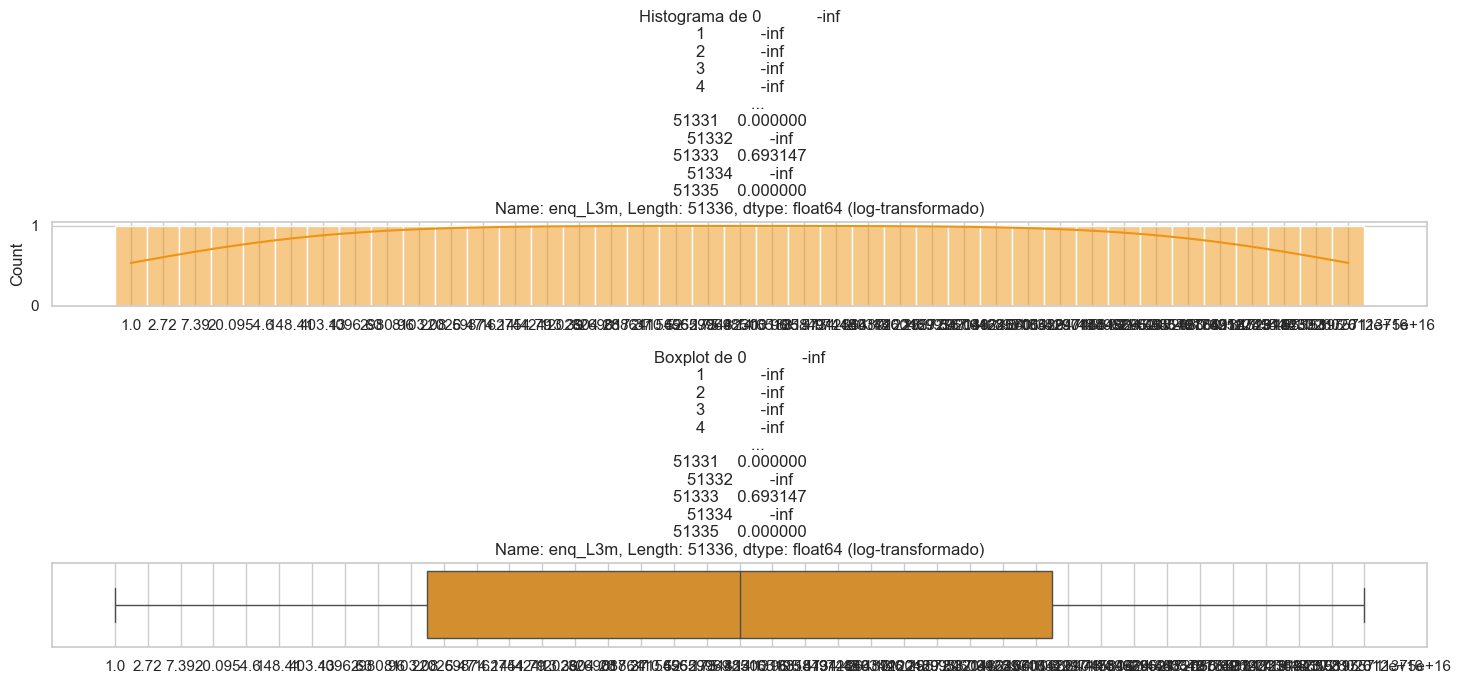

**AGE**

Estadísticos:

Mínimo: 21
Máximo: 77
Promedio: 33.76
Std.dev %: 26.12%

Histograma y Boxplot de AGE.


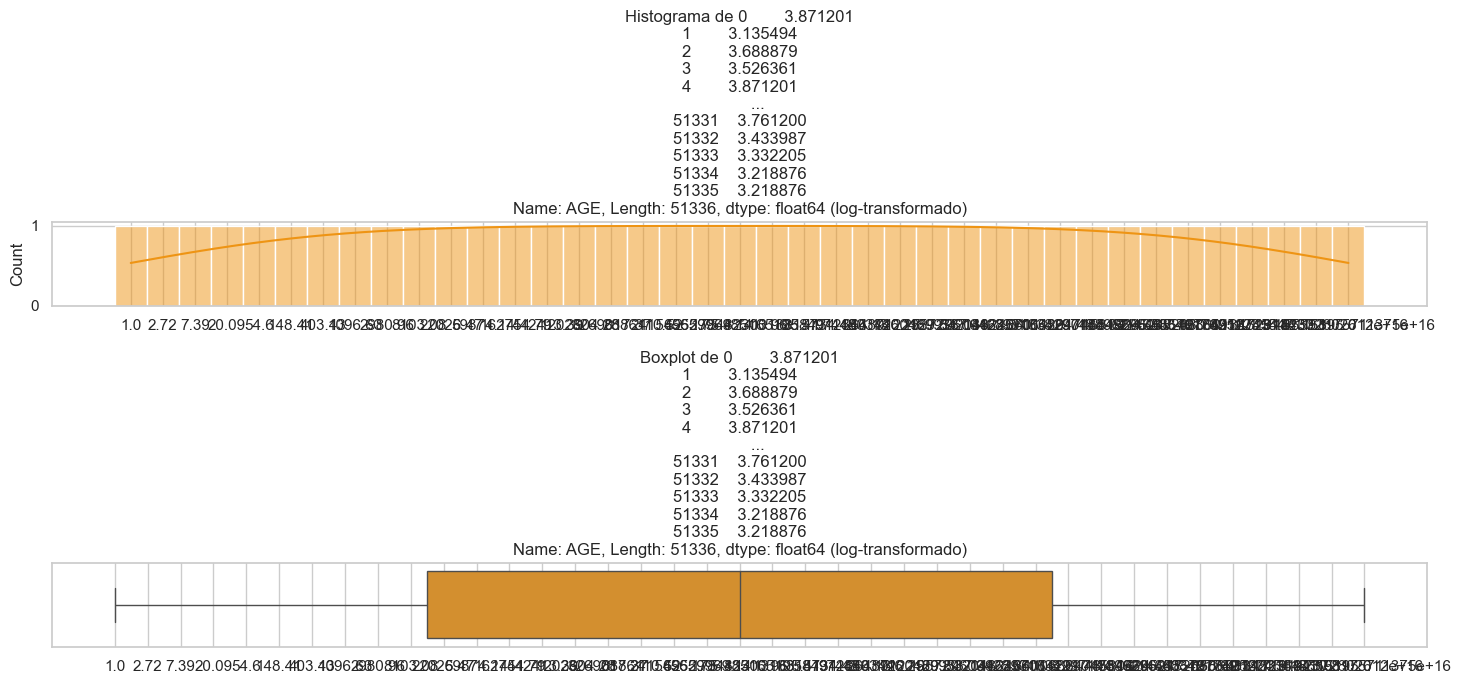

**NETMONTHLYINCOME**

Estadísticos:

Mínimo: 0
Máximo: 2500000
Promedio: 26424.19
Std.dev %: 75.79%

Histograma y Boxplot de NETMONTHLYINCOME.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


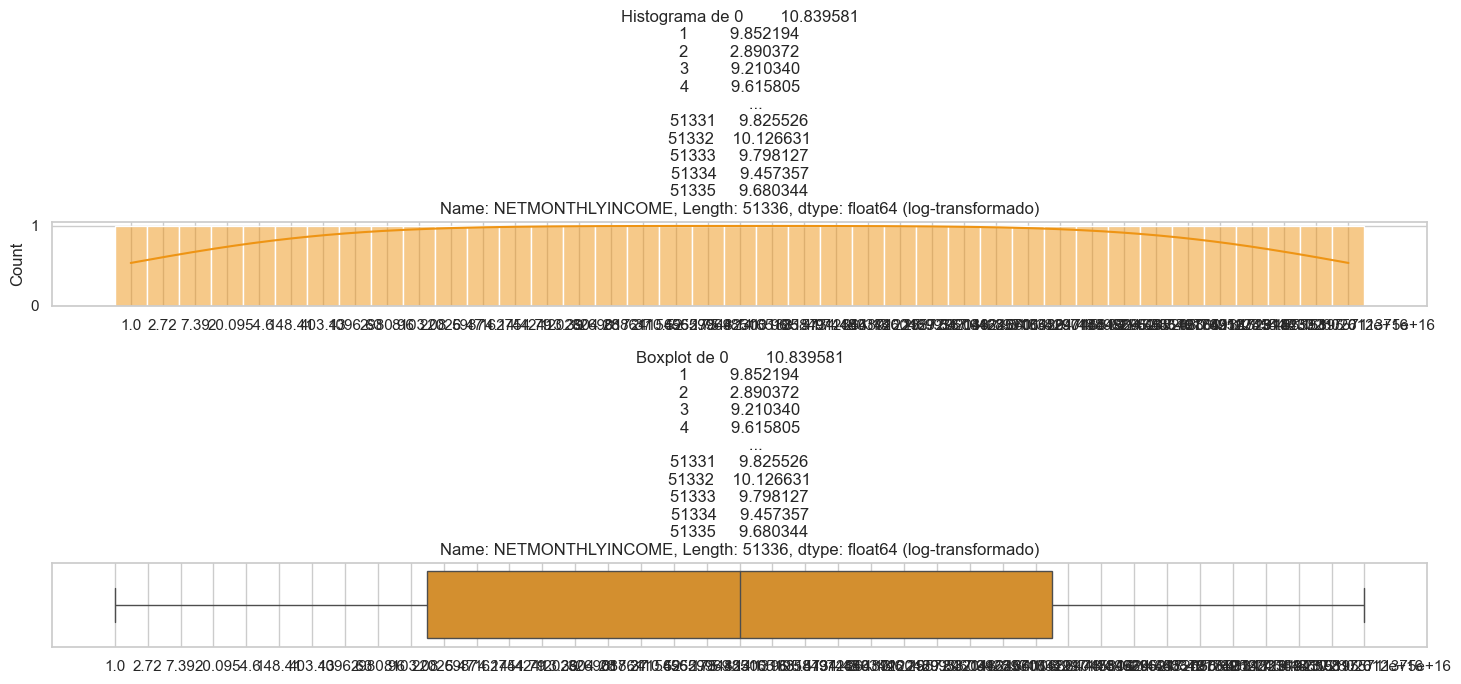

**TIME_WITH_CURR_EMPR**

Estadísticos:

Mínimo: 0.0
Máximo: 580.0
Promedio: 104.18
Std.dev %: 66.67%

Histograma y Boxplot de Time_With_Curr_Empr.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


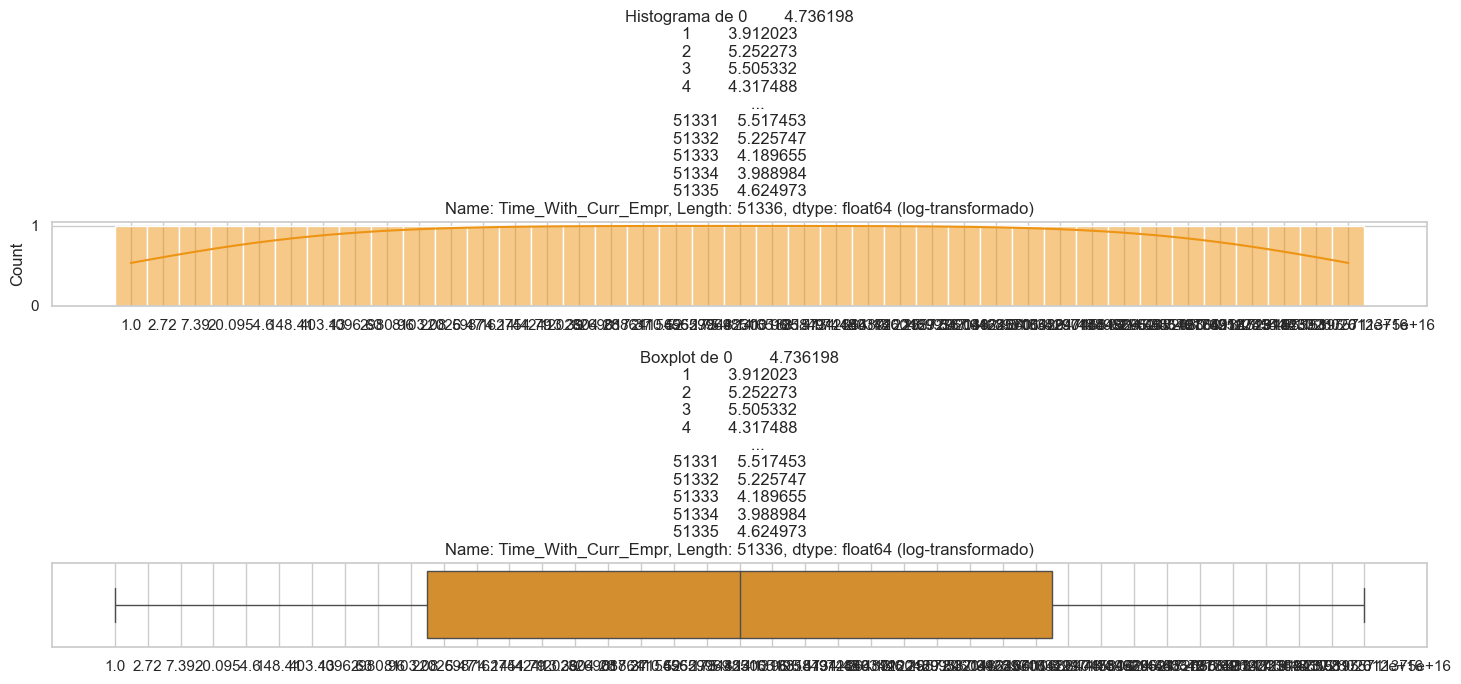

**PCT_OF_ACTIVE_TLS_EVER**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.58
Std.dev %: 65.77%

Histograma y Boxplot de pct_of_active_TLs_ever.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


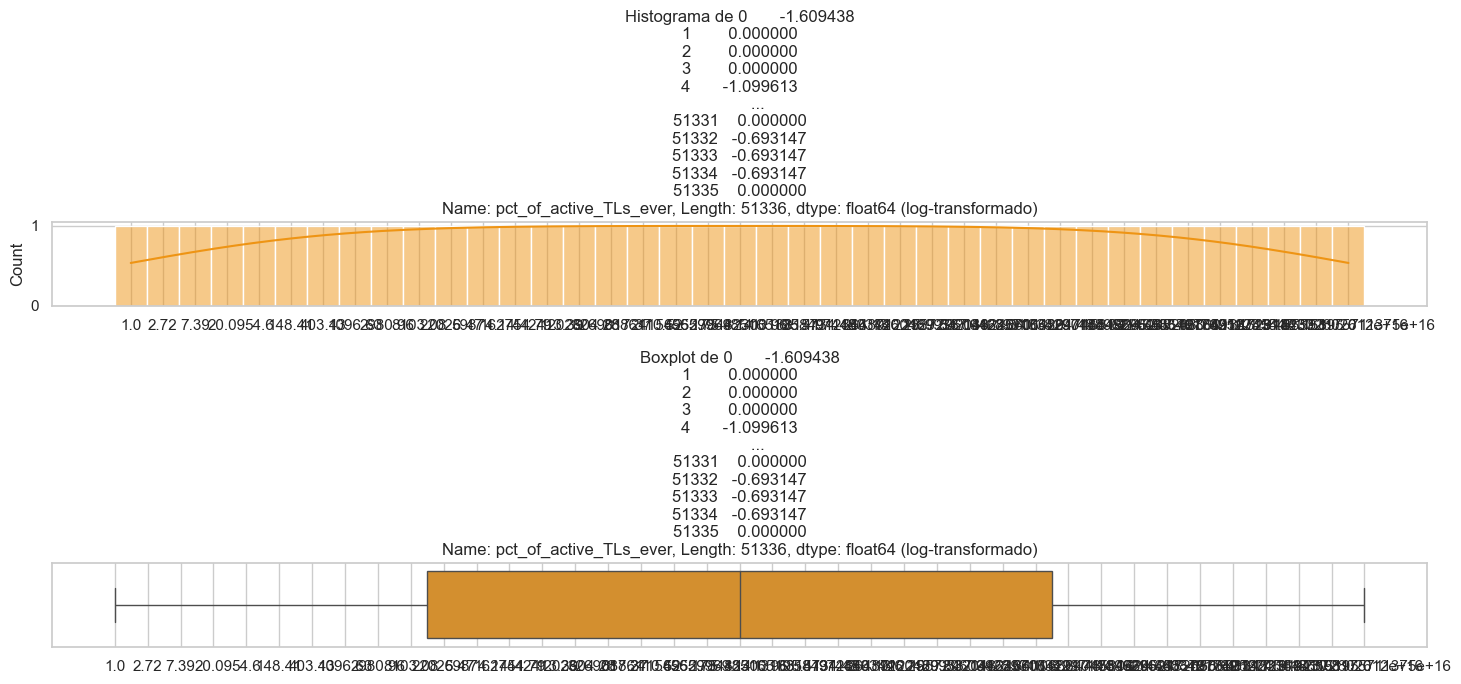

**PCT_OPENED_TLS_L6M_OF_L12M**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.3
Std.dev %: 134.03%

Histograma y Boxplot de pct_opened_TLs_L6m_of_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


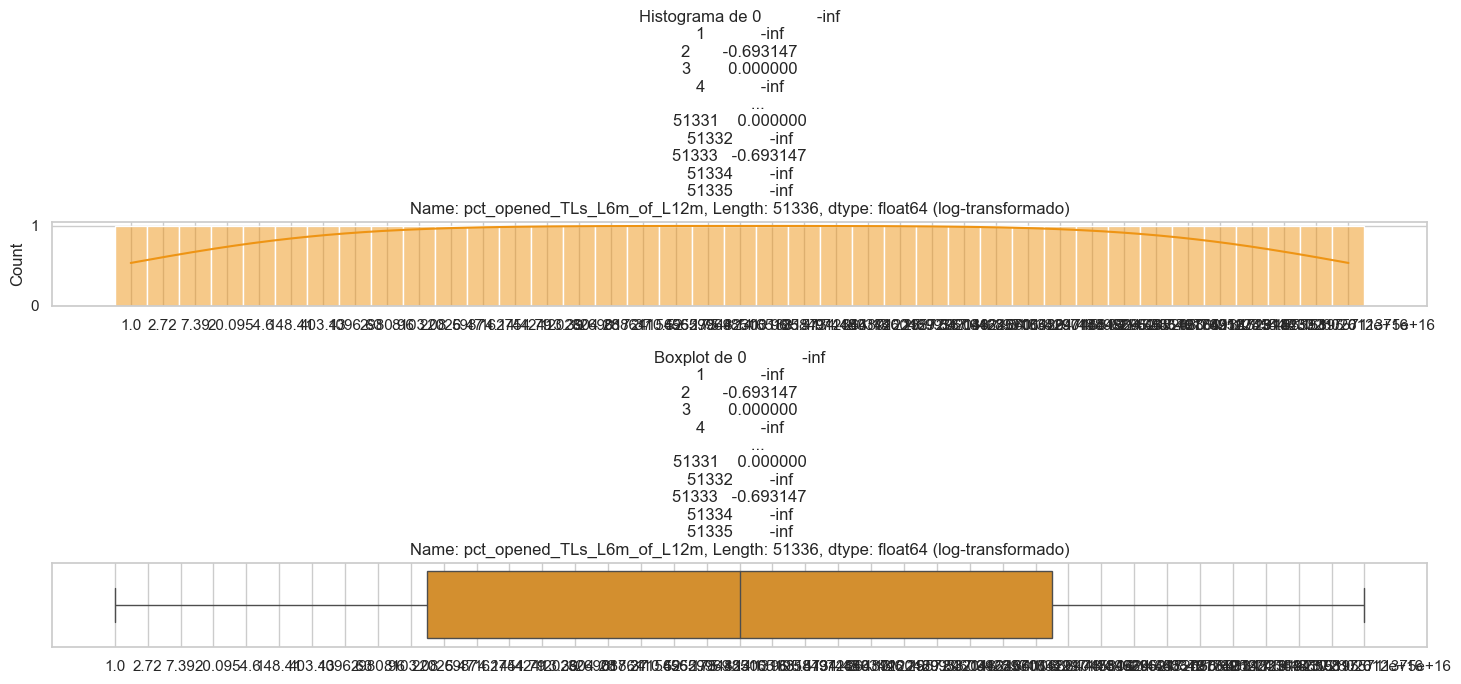

**PCT_CURRENTBAL_ALL_TL**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.53
Std.dev %: 70.78%

Histograma y Boxplot de pct_currentBal_all_TL.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


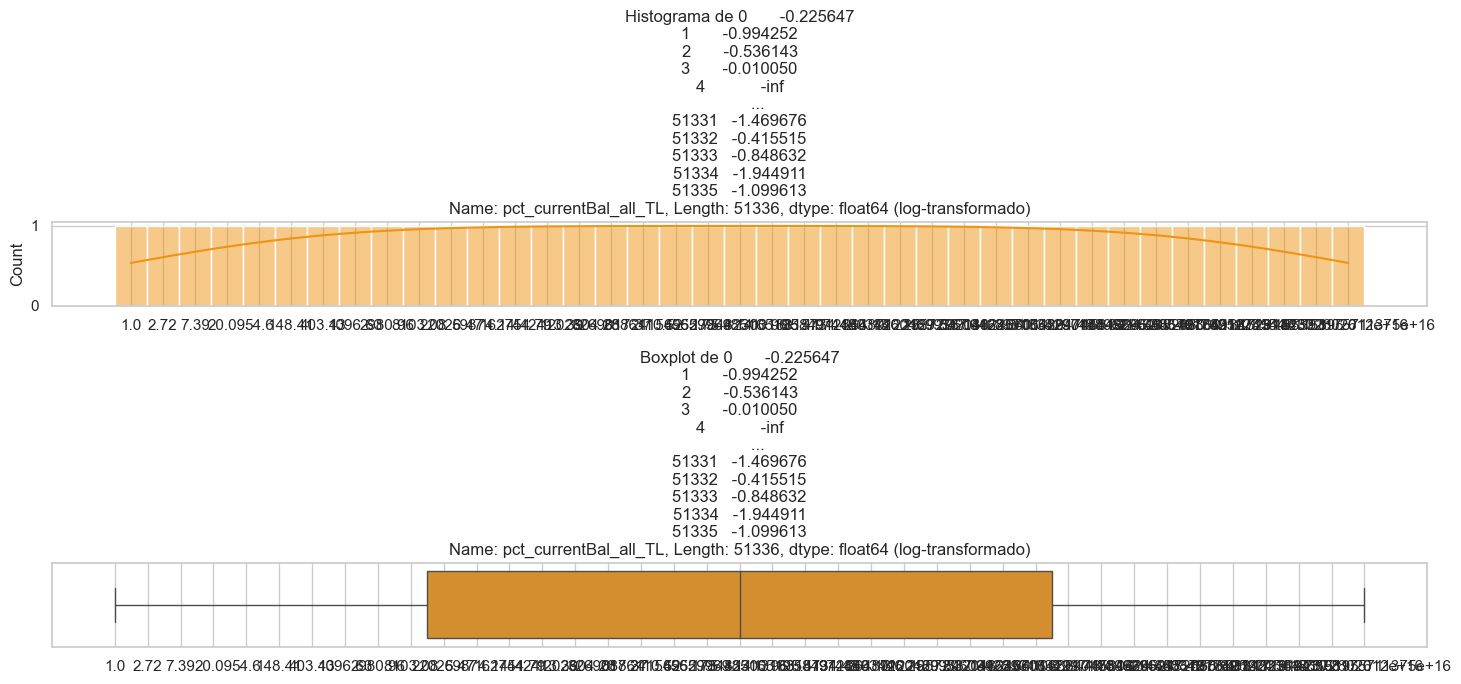

**CC_UTILIZATION**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev %: 432.48%

Histograma y Boxplot de CC_utilization.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


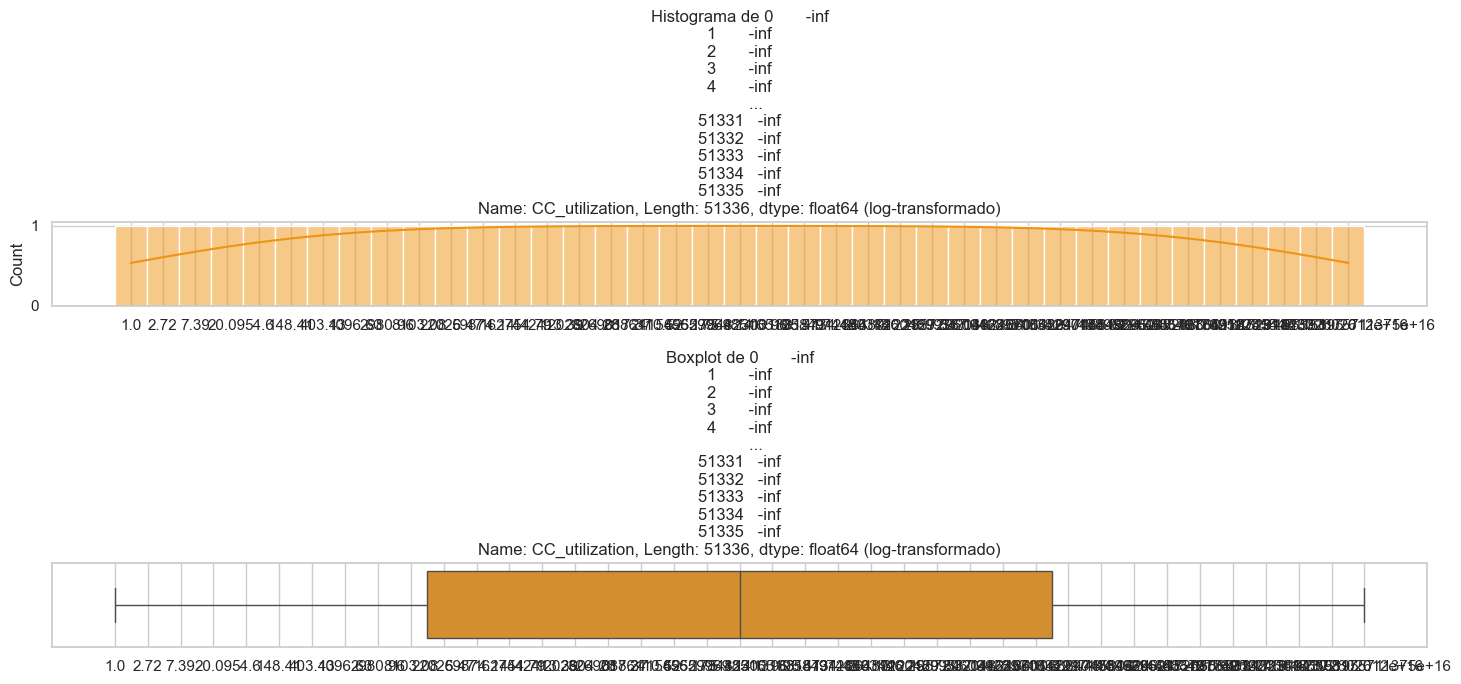

**PL_UTILIZATION**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.1
Std.dev %: 269.89%

Histograma y Boxplot de PL_utilization.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


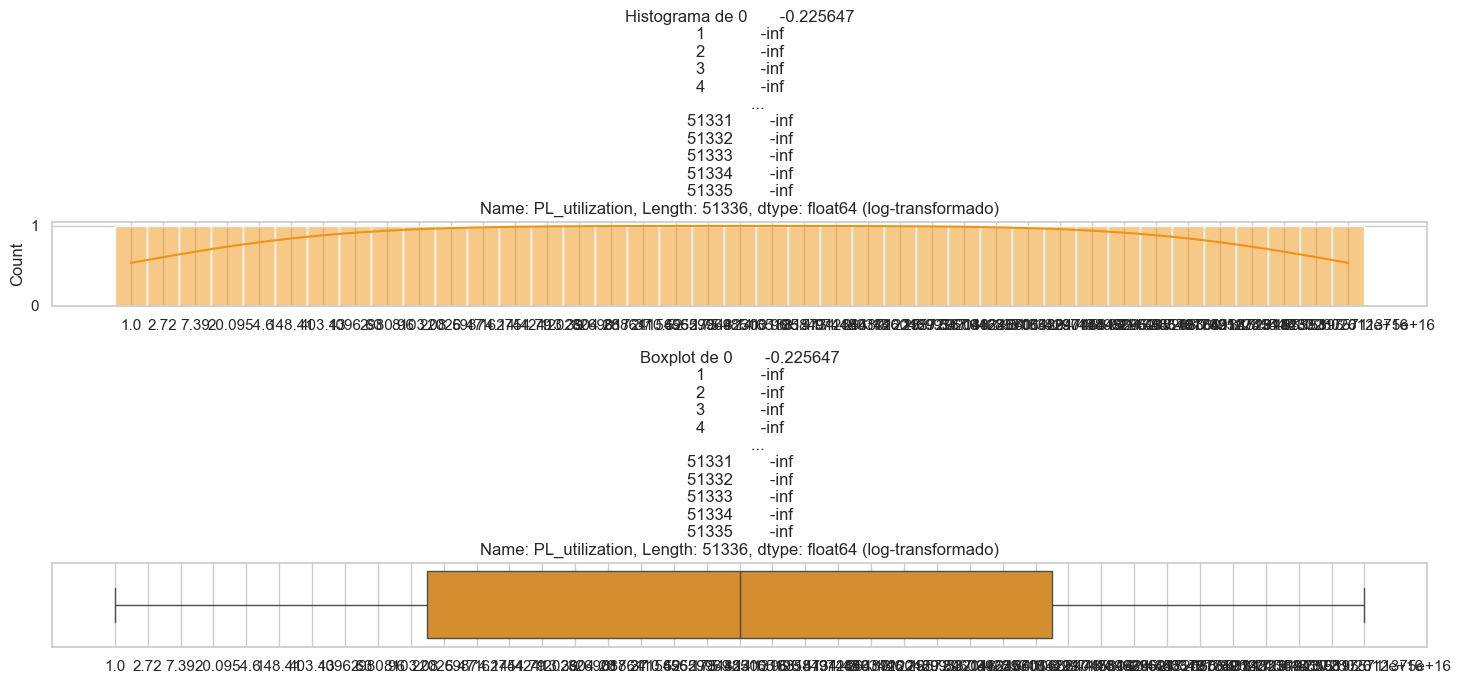

**PCT_PL_ENQ_L6M_OF_L12M**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev %: 197.58%

Histograma y Boxplot de pct_PL_enq_L6m_of_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


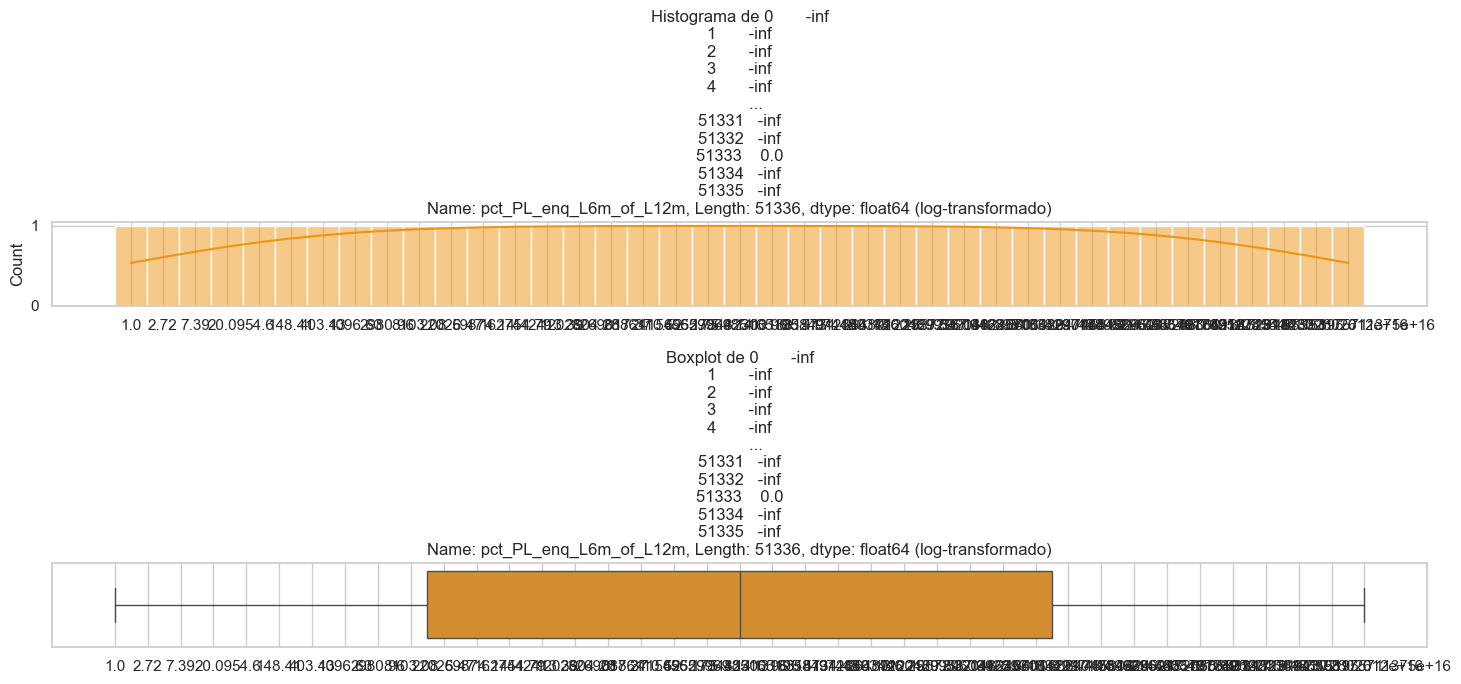

**PCT_CC_ENQ_L6M_OF_L12M**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.07
Std.dev %: 361.61%

Histograma y Boxplot de pct_CC_enq_L6m_of_L12m.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


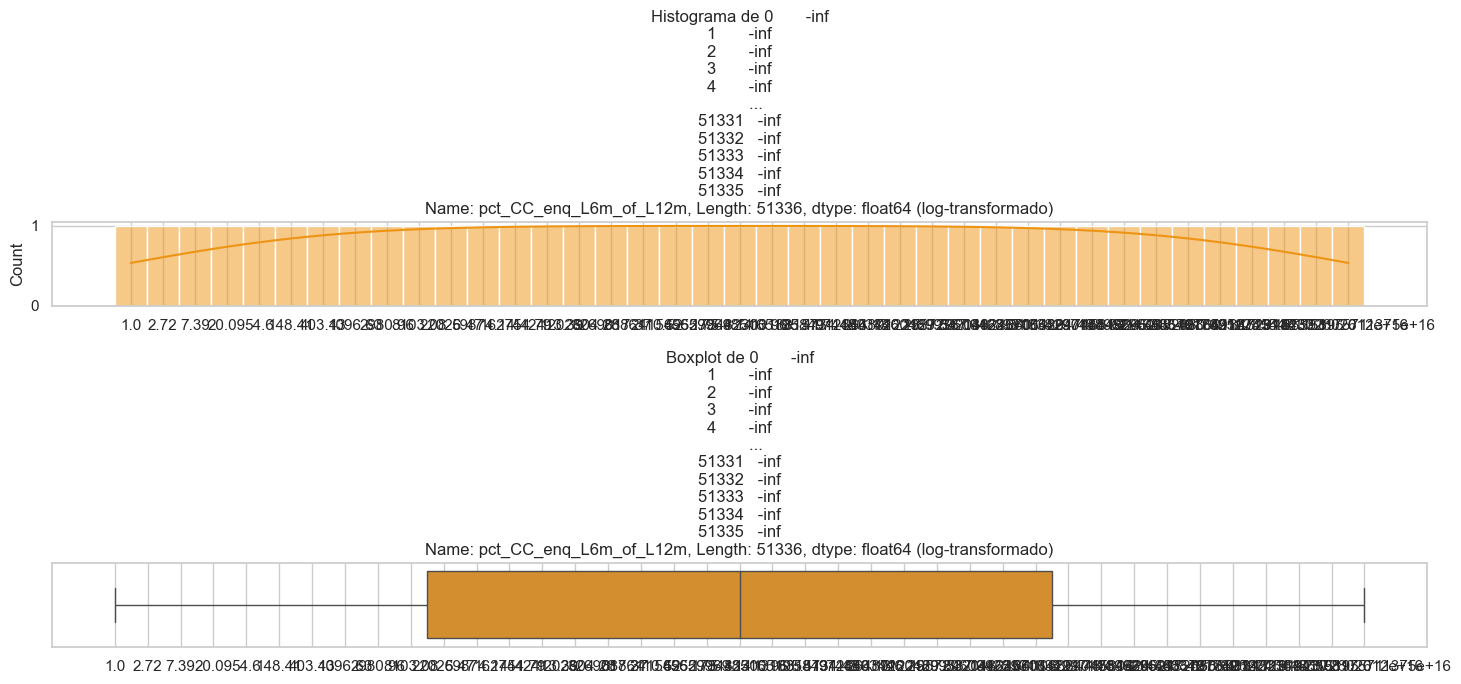

**PCT_PL_ENQ_L6M_OF_EVER**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.17
Std.dev %: 205.41%

Histograma y Boxplot de pct_PL_enq_L6m_of_ever.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


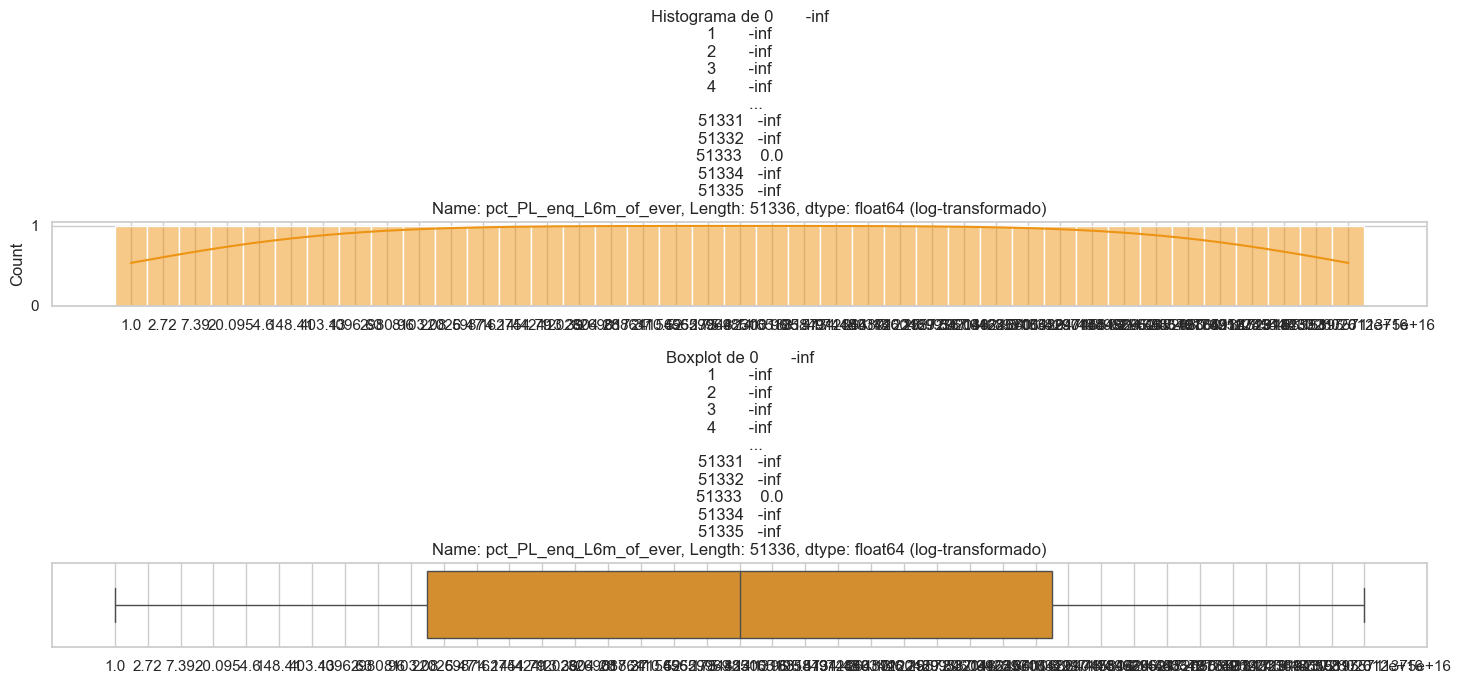

**PCT_CC_ENQ_L6M_OF_EVER**

Estadísticos:

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.06
Std.dev %: 379.22%

Histograma y Boxplot de pct_CC_enq_L6m_of_ever.


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

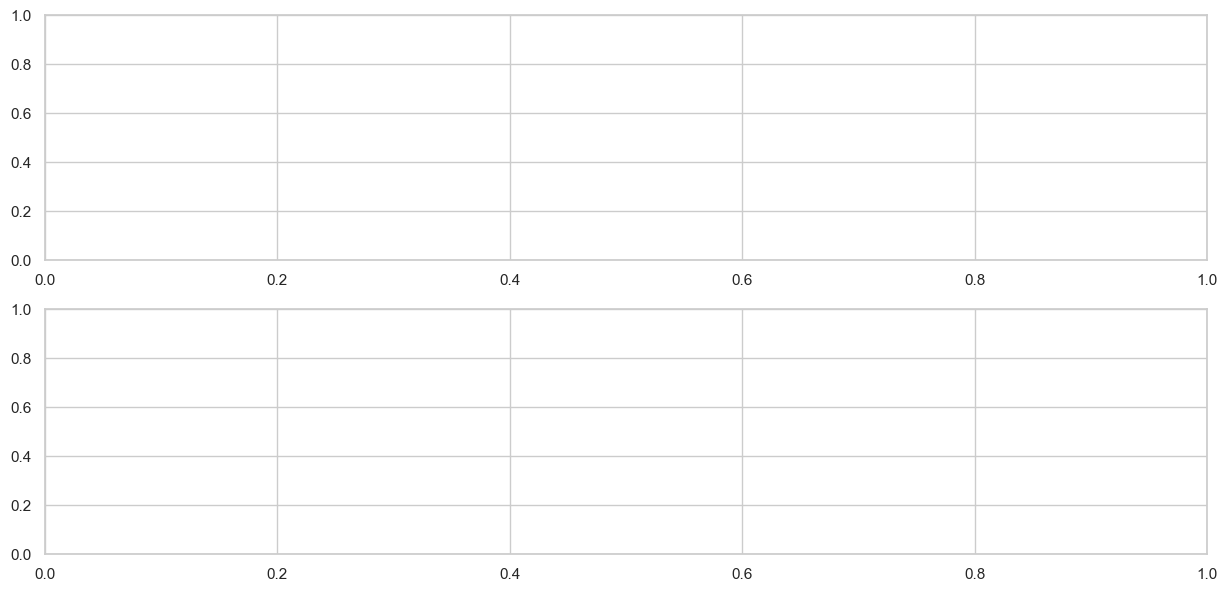

In [185]:
for v_num in numeric_features:
    Count_Quant(external, v_num)

## 4. Análisis Bivariante (Correlaciones)

In [96]:
def Analyze_Categorical_Features(df, cat_features, target_column):
    print(f"\nAnálisis de variables categóricas respecto a la columna objetivo '{target_column}':\n")

    for v in cat_features:
        if v == target_column:
            continue

        else:
            # Estadísticos descriptivos
            print(f"\nVariable categórica: {v}")
            print(f"Número de categorías únicas: {df[v].nunique()}")
            print(f"Frecuencia de las categorías principales:\n{df[v].value_counts().head()}\n")

            # Crear tabla cruzada
            cross_tab = pd.crosstab(df[v], df[target_column])

            # Graficar barras apiladas
            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
            plt.title(f'Distribución de {v} vs {target_column}')
            plt.xlabel(v)
            plt.ylabel('Conteo')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_column)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()


In [ ]:
for 

### 5. Cardinalidad y estandarización(nomralización)